## **Risk and Voltality

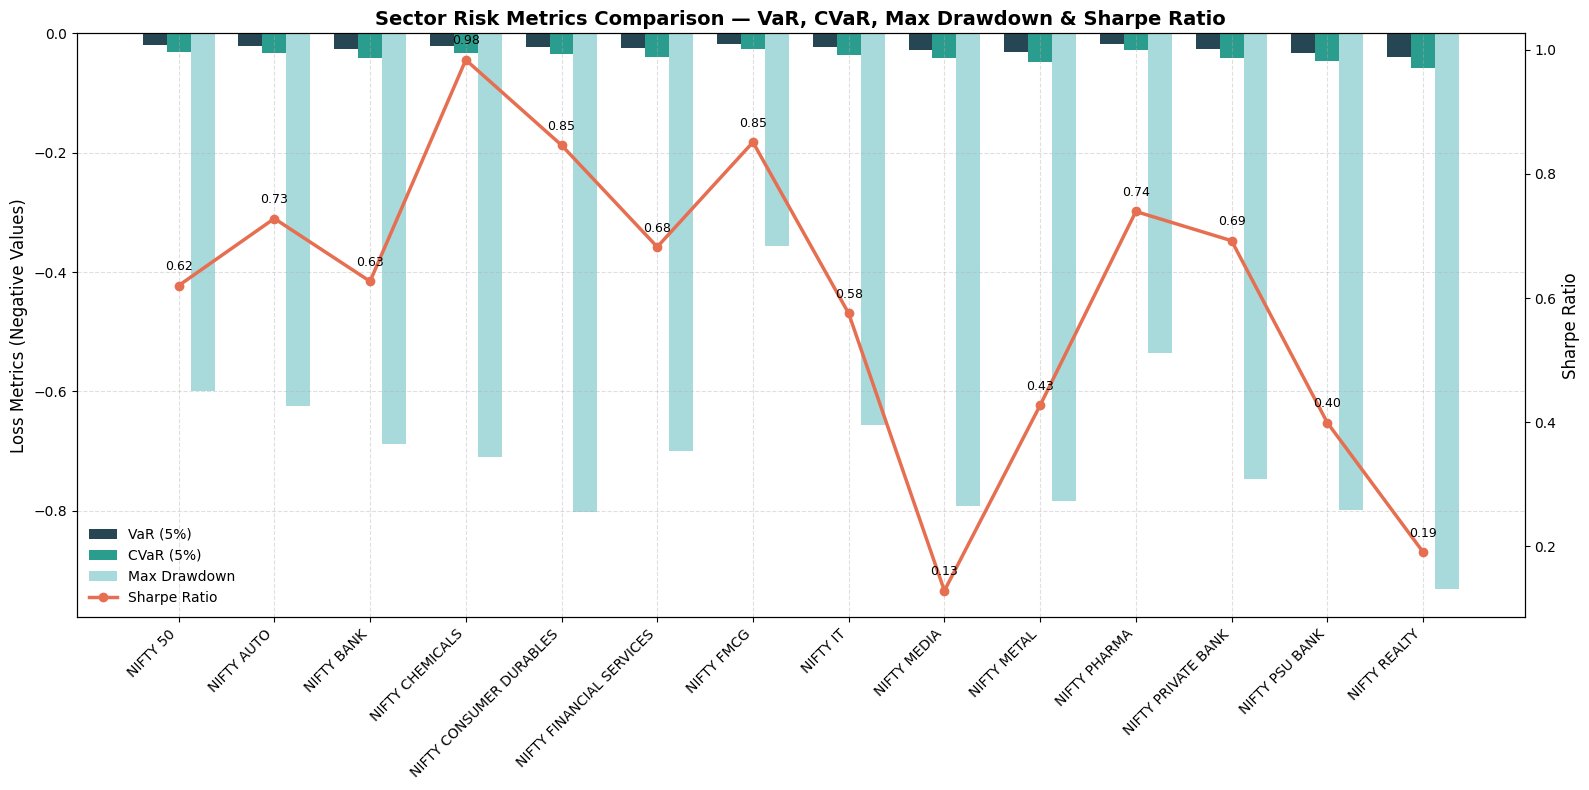

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "Sector": ["NIFTY 50", "NIFTY AUTO", "NIFTY BANK", "NIFTY CHEMICALS", "NIFTY CONSUMER DURABLES",
               "NIFTY FINANCIAL SERVICES", "NIFTY FMCG", "NIFTY IT", "NIFTY MEDIA", "NIFTY METAL",
               "NIFTY PHARMA", "NIFTY PRIVATE BANK", "NIFTY PSU BANK", "NIFTY REALTY"],
    "VaR (5%)": [-0.01888, -0.02177, -0.02637, -0.02078, -0.02210, -0.02525, -0.01724,
                 -0.02320, -0.02709, -0.03143, -0.01845, -0.02616, -0.03303, -0.03895],
    "CVaR (5%)": [-0.03106, -0.03284, -0.04055, -0.03281, -0.03525, -0.03979, -0.02637,
                  -0.03614, -0.04140, -0.04720, -0.02759, -0.04196, -0.04678, -0.05846],
    "Max Drawdown": [-0.59856, -0.62382, -0.68783, -0.70917, -0.80206, -0.69992, -0.35639,
                     -0.65664, -0.79257, -0.78362, -0.53494, -0.74650, -0.79776, -0.93172],
    "Sharpe Ratio": [0.61999, 0.72814, 0.62689, 0.98378, 0.84640, 0.68238, 0.85114,
                     0.57520, 0.12833, 0.42709, 0.73946, 0.69239, 0.39921, 0.19079]
}

df = pd.DataFrame(data)

# --- Plot setup ---
plt.figure(figsize=(16, 8))
x = np.arange(len(df["Sector"]))
bar_width = 0.25

# Bars (risk metrics)
b1 = plt.bar(x - bar_width, df["VaR (5%)"], width=bar_width, color="#264653", label="VaR (5%)")
b2 = plt.bar(x, df["CVaR (5%)"], width=bar_width, color="#2a9d8f", label="CVaR (5%)")
b3 = plt.bar(x + bar_width, df["Max Drawdown"], width=bar_width, color="#a8dadc", label="Max Drawdown")

# Line for Sharpe Ratio
ax1 = plt.gca()
ax2 = ax1.twinx()
l1, = ax2.plot(x, df["Sharpe Ratio"], marker="o", linewidth=2.5, label="Sharpe Ratio", color="#e76f51")

# Annotate Sharpe points
for i, val in enumerate(df["Sharpe Ratio"]):
    ax2.text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

# Axis settings
ax1.set_xticks(x)
ax1.set_xticklabels(df["Sector"], rotation=45, ha='right', fontsize=10)
ax1.set_ylabel("Loss Metrics (Negative Values)", fontsize=12)
ax2.set_ylabel("Sharpe Ratio", fontsize=12)

# Title and grid
plt.title("Sector Risk Metrics Comparison — VaR, CVaR, Max Drawdown & Sharpe Ratio", fontsize=14, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.4)

# --- Combined Legend at Bottom-Left ---
handles = [b1, b2, b3, l1]
labels = ["VaR (5%)", "CVaR (5%)", "Max Drawdown", "Sharpe Ratio"]
plt.legend(handles, labels, loc='lower left', frameon=False, fontsize=10)

# Save figure
plt.tight_layout()
plt.savefig("Risk_Metrics_Comparison_Improved.png", dpi=600, bbox_inches="tight")
plt.show()



===== 📈 Sectoral Risk Summary =====

                      Sector  Mean Daily Return  Daily Volatility  \
0                   NIFTY 50            0.00043           0.01432   
1                 NIFTY AUTO            0.00059           0.01476   
2                 NIFTY BANK            0.00063           0.01789   
3            NIFTY CHEMICALS            0.00068           0.01389   
4    NIFTY CONSUMER DURABLES            0.00072           0.01507   
5   NIFTY FINANCIAL SERVICES            0.00061           0.01719   
6                 NIFTY FMCG            0.00054           0.01353   
7                   NIFTY IT            0.00080           0.02091   
8                NIFTY MEDIA            0.00010           0.01789   
9                NIFTY METAL            0.00042           0.02130   
10              NIFTY PHARMA            0.00051           0.01250   
11        NIFTY PRIVATE BANK            0.00065           0.01789   
12            NIFTY PSU BANK            0.00036           0.02177

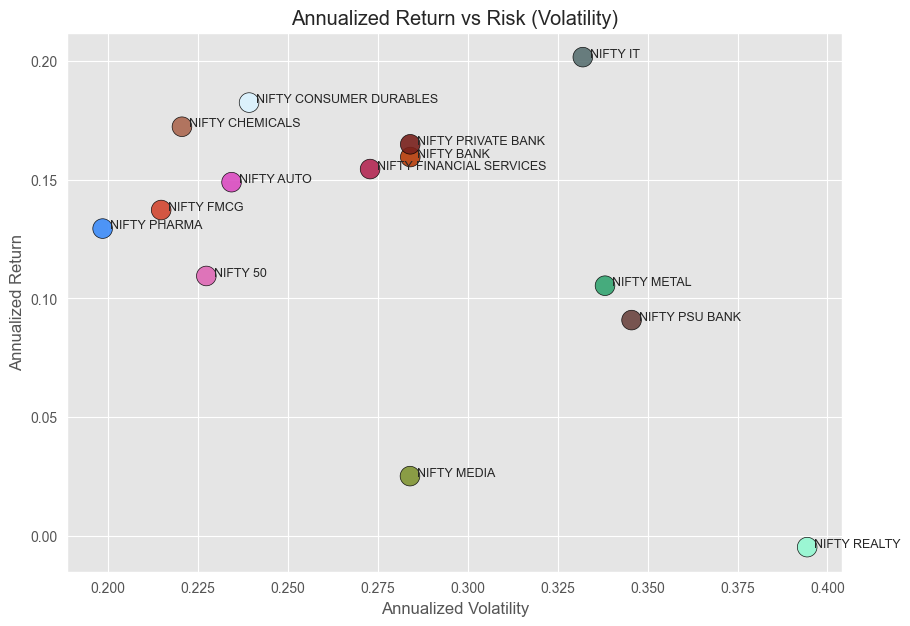

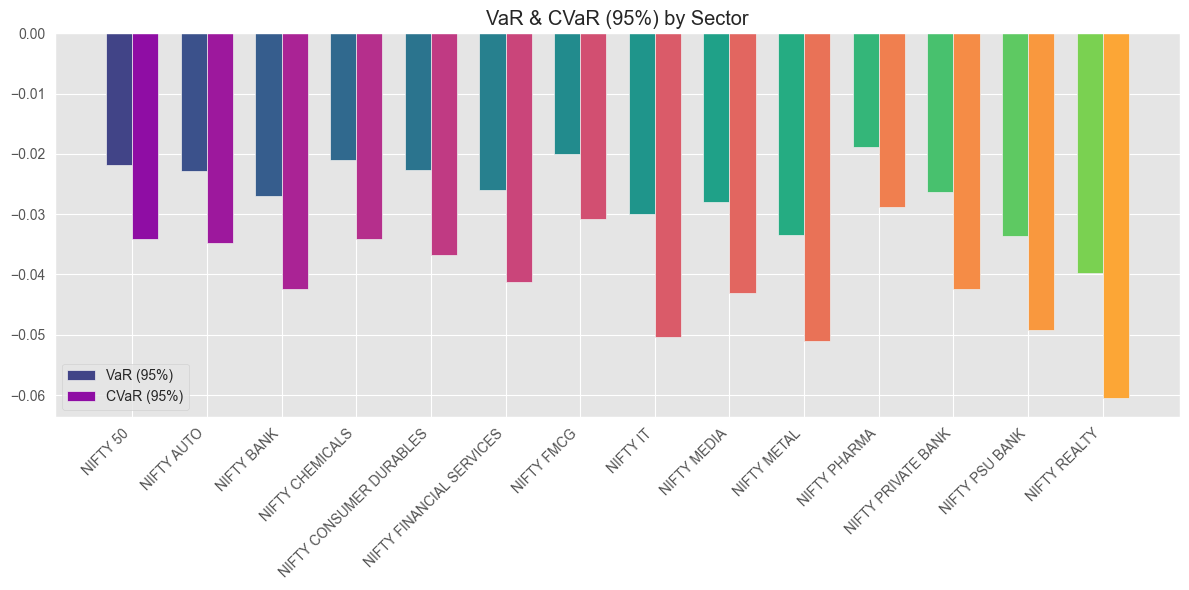

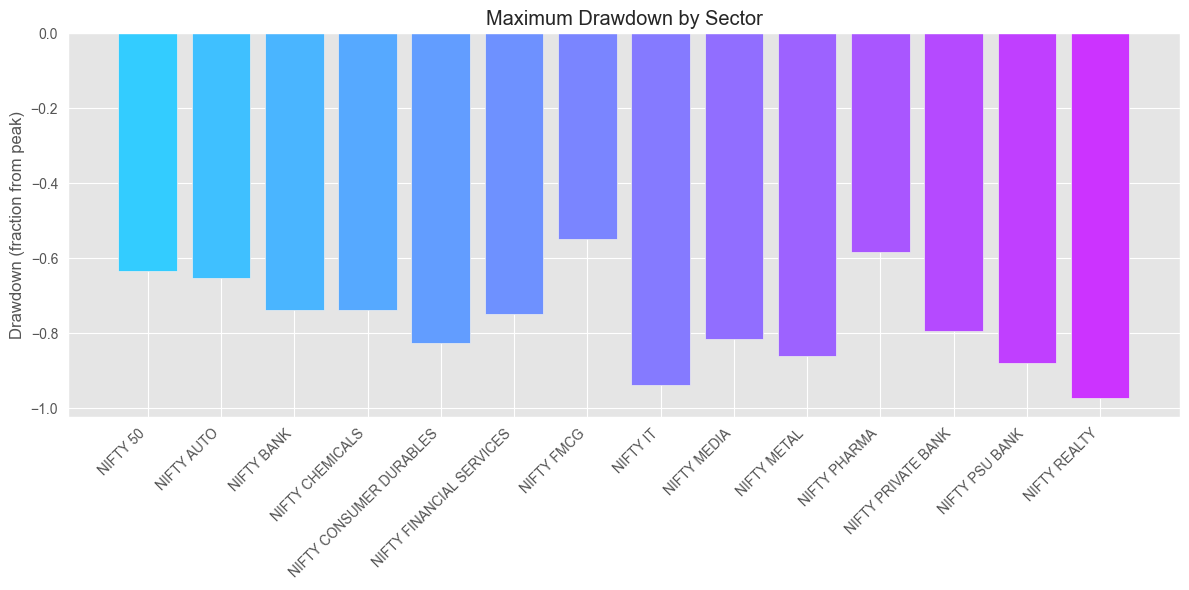

In [5]:
# ============================================================
# 📊 Comprehensive Sectoral Risk Analysis
# ============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing your 15 CSV files
DATA_DIR = r"C:\Users\Shobith\Downloads\index data updated\index data updated"   # change to your folder path
plt.style.use("ggplot")

# ============================================================
# 1️⃣ Helper Function: Compute Full Risk Metrics
# ============================================================
def compute_risk_metrics(df, confidence_level=0.95):
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    # Compute daily log returns
    df["Return"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(inplace=True)

    # --- Basic Metrics ---
    mean_return = df["Return"].mean()
    volatility = df["Return"].std()

    # Annualized versions (≈252 trading days)
    annualized_return = mean_return * 252
    annualized_volatility = volatility * np.sqrt(252)

    # --- Risk Metrics ---
    var_95 = np.percentile(df["Return"], (1 - confidence_level) * 100)
    cvar_95 = df[df["Return"] <= var_95]["Return"].mean()

    # --- Maximum Drawdown ---
    cumulative = (1 + df["Return"]).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = drawdown.min()

    # --- Sharpe Ratio ---
    sharpe_ratio = mean_return / volatility if volatility != 0 else np.nan

    metrics = {
        "Mean Daily Return": mean_return,
        "Daily Volatility": volatility,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "VaR (95%)": var_95,
        "CVaR (95%)": cvar_95,
        "Max Drawdown": max_drawdown,
        "Sharpe Ratio": sharpe_ratio
    }
    return metrics, df

# ============================================================
# 2️⃣ Process All Sector CSVs
# ============================================================
results = []

for file in os.listdir(DATA_DIR):
    if file.endswith(".csv"):
        sector_name = os.path.splitext(file)[0]
        path = os.path.join(DATA_DIR, file)
        df = pd.read_csv(path)

        if not set(["Index Name", "Date", "Open", "High", "Low", "Close"]).issubset(df.columns):
            print(f"⚠️ Skipping {file} (missing columns)")
            continue

        metrics, processed_df = compute_risk_metrics(df)
        metrics["Sector"] = df["Index Name"].iloc[0] if "Index Name" in df.columns else sector_name
        results.append(metrics)

# ============================================================
# 3️⃣ Create Summary DataFrame
# ============================================================
risk_df = pd.DataFrame(results)
risk_df = risk_df[[
    "Sector", "Mean Daily Return", "Daily Volatility",
    "Annualized Return", "Annualized Volatility",
    "VaR (95%)", "CVaR (95%)", "Max Drawdown", "Sharpe Ratio"
]]

print("\n===== 📈 Sectoral Risk Summary =====\n")
print(risk_df.round(5))

# ============================================================
# 4️⃣ Visualization 1: Risk (Volatility) vs Return
# ============================================================
plt.figure(figsize=(10, 7))
plt.scatter(risk_df["Annualized Volatility"], risk_df["Annualized Return"],
            s=200, c=np.random.rand(len(risk_df),3), edgecolors='black', alpha=0.9)

for _, row in risk_df.iterrows():
    plt.text(row["Annualized Volatility"]+0.002, row["Annualized Return"], row["Sector"], fontsize=9)

plt.title("Annualized Return vs Risk (Volatility)")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.grid(True)
plt.show()

# ============================================================
# 5️⃣ Visualization 2: VaR and CVaR Comparison
# ============================================================
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(risk_df))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(risk_df)))

plt.bar(indices, risk_df["VaR (95%)"], bar_width, label="VaR (95%)", color=colors)
plt.bar(indices + bar_width, risk_df["CVaR (95%)"], bar_width, label="CVaR (95%)", color=plt.cm.plasma(np.linspace(0.3, 0.8, len(risk_df))))

plt.xticks(indices + bar_width / 2, risk_df["Sector"], rotation=45, ha='right')
plt.title("VaR & CVaR (95%) by Sector")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 6️⃣ Visualization 3: Maximum Drawdown (Risk Severity)
# ============================================================
plt.figure(figsize=(12, 6))
colors = plt.cm.cool(np.linspace(0.2, 0.8, len(risk_df)))
plt.bar(risk_df["Sector"], risk_df["Max Drawdown"], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Maximum Drawdown by Sector")
plt.ylabel("Drawdown (fraction from peak)")
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\Shobith\Downloads\index data updated\index data updated\NIFTY 50.csv")

# Ensure Date is datetime and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Cumulative returns
df['Cumulative'] = (1 + df['Return']).cumprod()

# Rolling maximum
df['Rolling_Max'] = df['Cumulative'].cummax()

# Drawdown
df['Drawdown'] = df['Cumulative'] / df['Rolling_Max'] - 1

# Maximum Drawdown
max_drawdown = df['Drawdown'].min()
print(f"✅ Maximum Drawdown (2007–2025) for NIFTY 50: {max_drawdown:.5f}")


✅ Maximum Drawdown (2007–2025) for NIFTY 50: -0.59856


✅ Risk metrics saved to C:\Users\Shobith\PycharmProjects\finalyr\index data updated\Sector_Risk_Metrics_2007_2025.csv


C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2001900105.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="Max Drawdown", data=risk_metrics, palette="viridis_r")


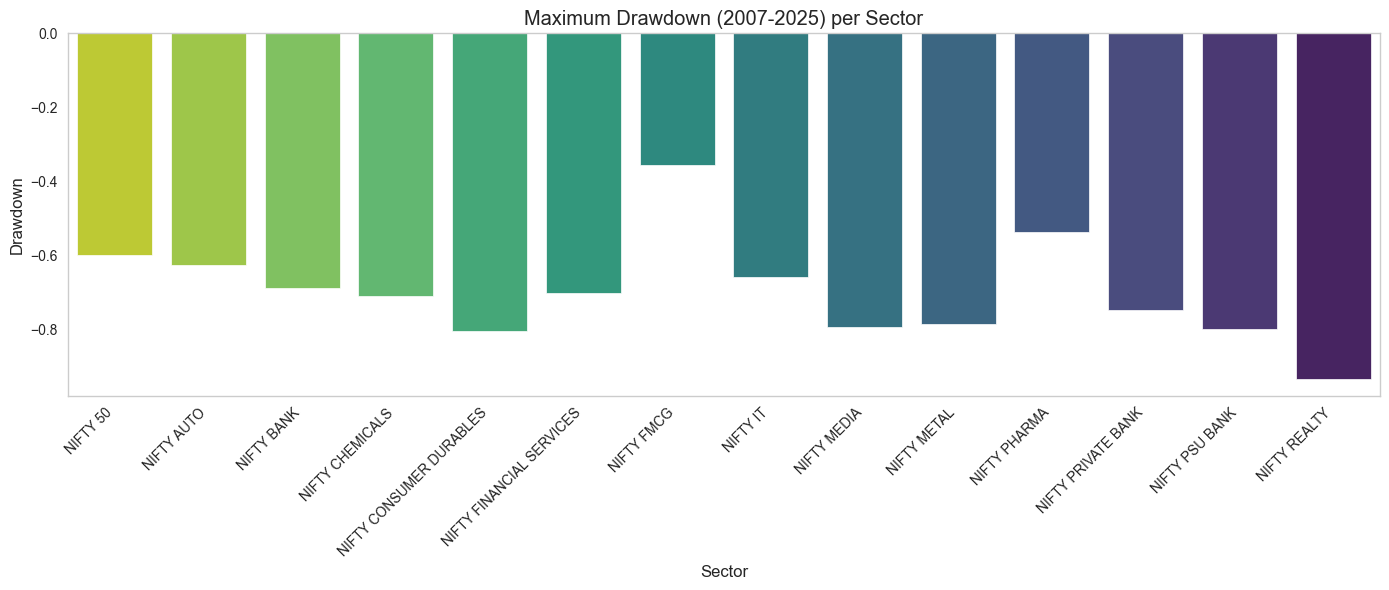

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2001900105.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="Sharpe Ratio", data=risk_metrics, palette="magma")


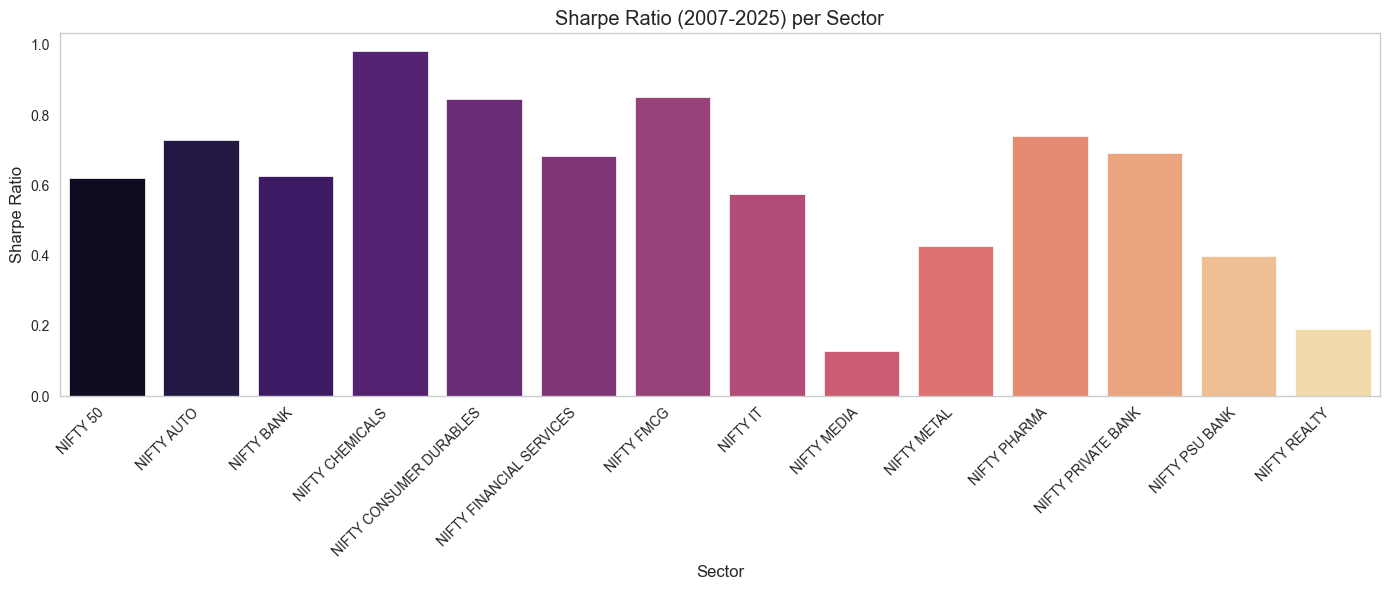

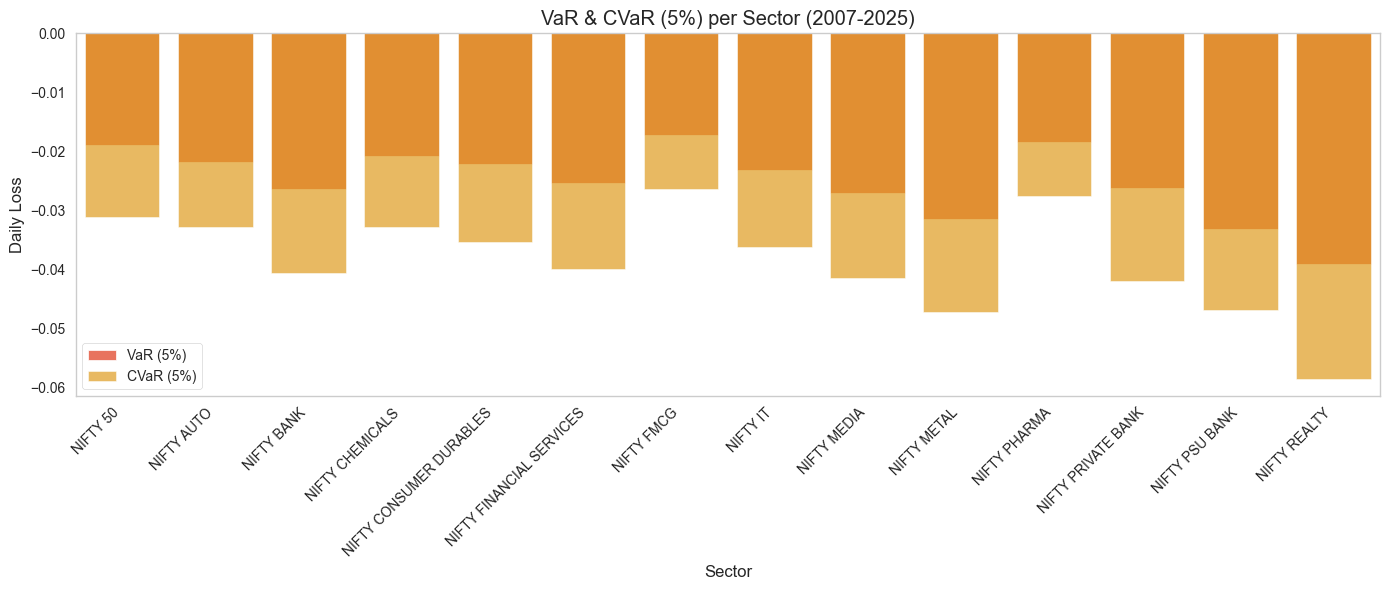

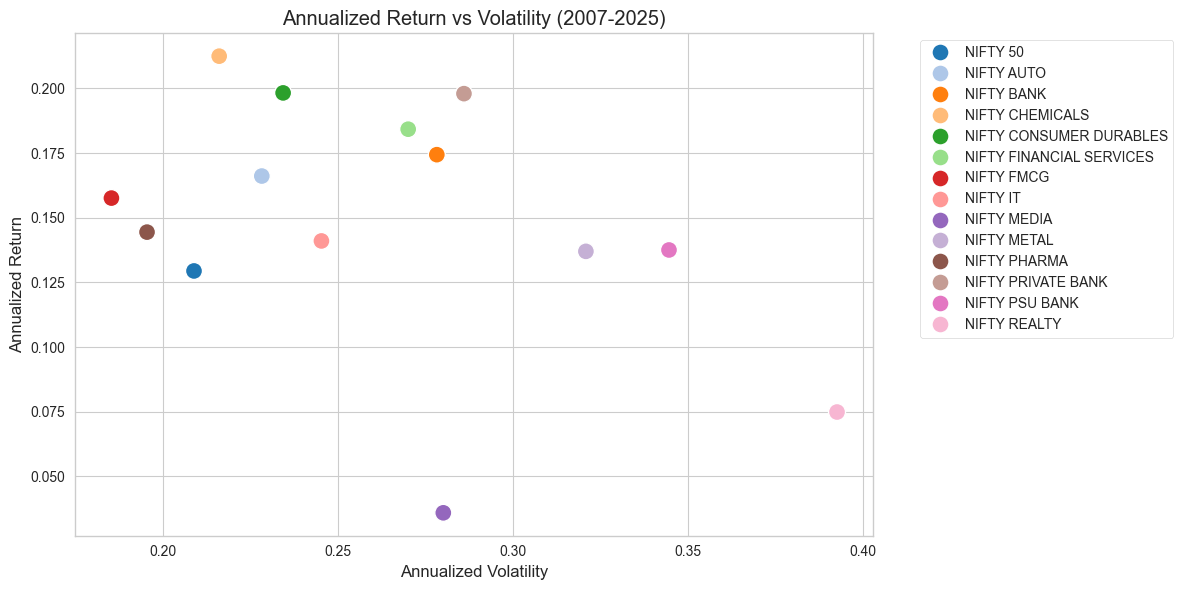

In [11]:
# =========================================
# DETAILED RISK METRICS FOR ALL SECTORS
# =========================================

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

# ================================
# 1️⃣ Define the folder path
# ================================
data_folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# ================================
# 2️⃣ Function to calculate risk metrics
# ================================
def calculate_risk_metrics(df, sector_name):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

    # Filter to ensure uniform 2007-2025 period
    df = df[(df['Date'].dt.year >= 2007) & (df['Date'].dt.year <= 2025)]

    # Daily returns
    df['Return'] = df['Close'].pct_change()

    # Daily volatility & mean
    mean_daily = df['Return'].mean()
    daily_vol = df['Return'].std()

    # Annualized return and volatility
    annual_return = (1 + mean_daily)**252 - 1
    annual_vol = daily_vol * np.sqrt(252)

    # Value at Risk (VaR) at 5%
    var_5 = df['Return'].quantile(0.05)

    # Conditional Value at Risk (CVaR) at 5%
    cvar_5 = df['Return'][df['Return'] <= var_5].mean()

    # Maximum Drawdown
    df['Cumulative'] = (1 + df['Return']).cumprod()
    df['Rolling_Max'] = df['Cumulative'].cummax()
    df['Drawdown'] = df['Cumulative'] / df['Rolling_Max'] - 1
    max_drawdown = df['Drawdown'].min()

    # Sharpe Ratio (assuming risk-free rate ~0)
    sharpe_ratio = annual_return / annual_vol if annual_vol != 0 else np.nan

    return {
        "Sector": sector_name,
        "Mean Daily Return": mean_daily,
        "Daily Volatility": daily_vol,
        "Annualized Return": annual_return,
        "Annualized Volatility": annual_vol,
        "VaR (5%)": var_5,
        "CVaR (5%)": cvar_5,
        "Max Drawdown": max_drawdown,
        "Sharpe Ratio": sharpe_ratio
    }

# ================================
# 3️⃣ Loop through all files and compute metrics
# ================================
metrics_list = []

for file in csv_files:
    sector_name = os.path.basename(file).replace(".csv", "")
    df = pd.read_csv(file)
    metrics = calculate_risk_metrics(df, sector_name)
    metrics_list.append(metrics)

# Convert to DataFrame
risk_metrics = pd.DataFrame(metrics_list)

# Save to CSV
output_file = os.path.join(data_folder, "Sector_Risk_Metrics_2007_2025.csv")
risk_metrics.to_csv(output_file, index=False)
print(f"✅ Risk metrics saved to {output_file}")

# ================================
# 4️⃣ Visualizations
# ================================

# (a) Maximum Drawdown
plt.figure(figsize=(14,6))
sns.barplot(x="Sector", y="Max Drawdown", data=risk_metrics, palette="viridis_r")
plt.xticks(rotation=45, ha='right')
plt.title("Maximum Drawdown (2007-2025) per Sector")
plt.ylabel("Drawdown")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (b) Sharpe Ratio
plt.figure(figsize=(14,6))
sns.barplot(x="Sector", y="Sharpe Ratio", data=risk_metrics, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Sharpe Ratio (2007-2025) per Sector")
plt.ylabel("Sharpe Ratio")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (c) VaR & CVaR
plt.figure(figsize=(14,6))
sns.barplot(x="Sector", y="VaR (5%)", data=risk_metrics, color="tomato", label="VaR (5%)")
sns.barplot(x="Sector", y="CVaR (5%)", data=risk_metrics, color="orange", alpha=0.7, label="CVaR (5%)")
plt.xticks(rotation=45, ha='right')
plt.title("VaR & CVaR (5%) per Sector (2007-2025)")
plt.ylabel("Daily Loss")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (d) Annualized Return vs Volatility
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="Annualized Volatility",
    y="Annualized Return",
    data=risk_metrics,
    hue="Sector",
    s=150,
    palette="tab20"
)
plt.title("Annualized Return vs Volatility (2007-2025)")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1983394312.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  gradient_colors = cm.get_cmap('plasma', n_sectors)  # 'plasma' gives a bright gradient
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1983394312.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


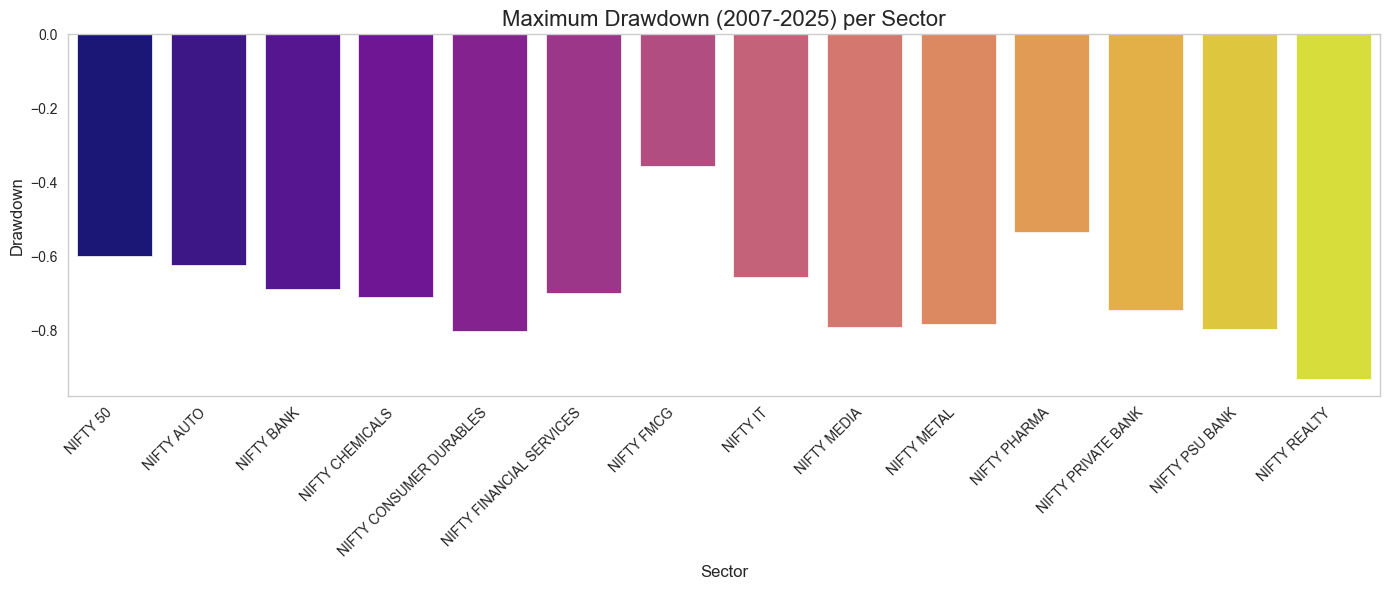

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1983394312.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


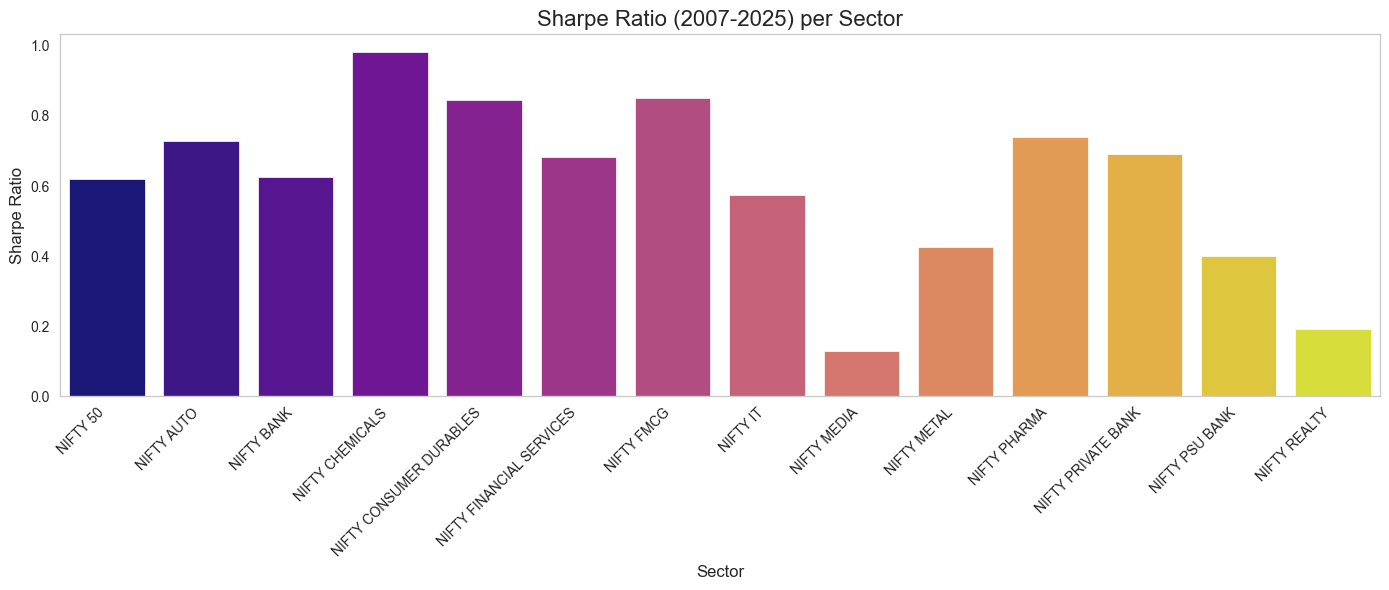

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1983394312.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1983394312.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


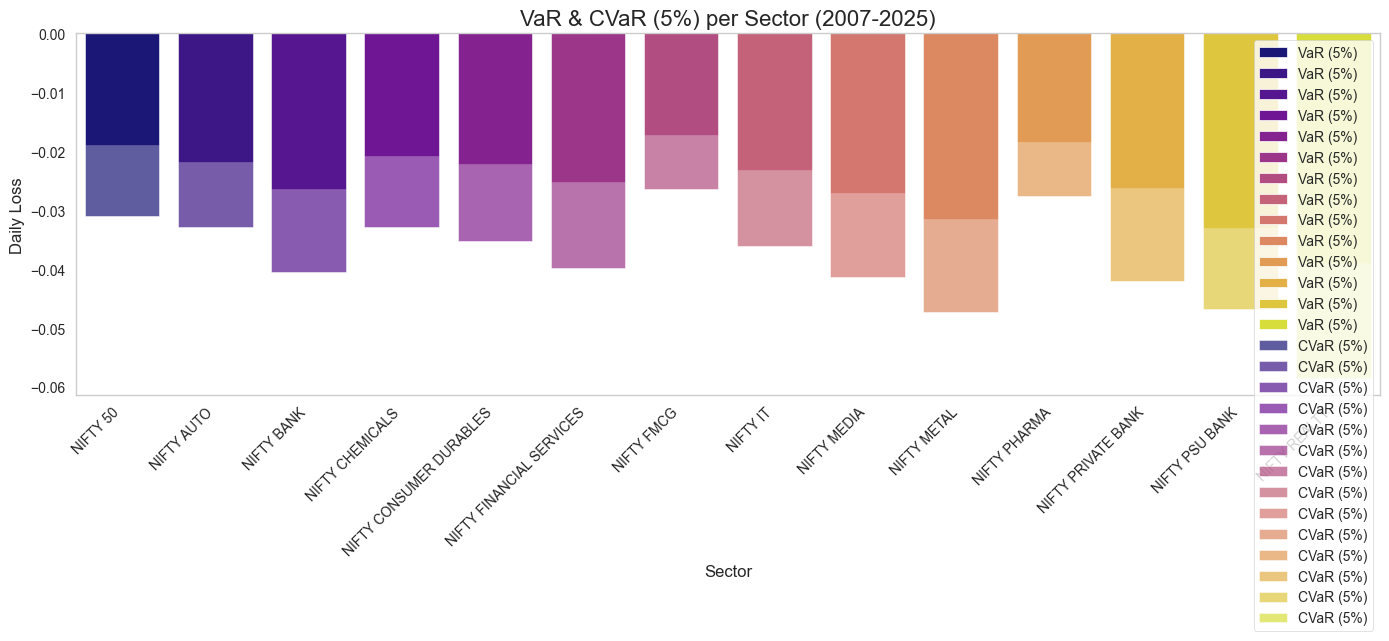

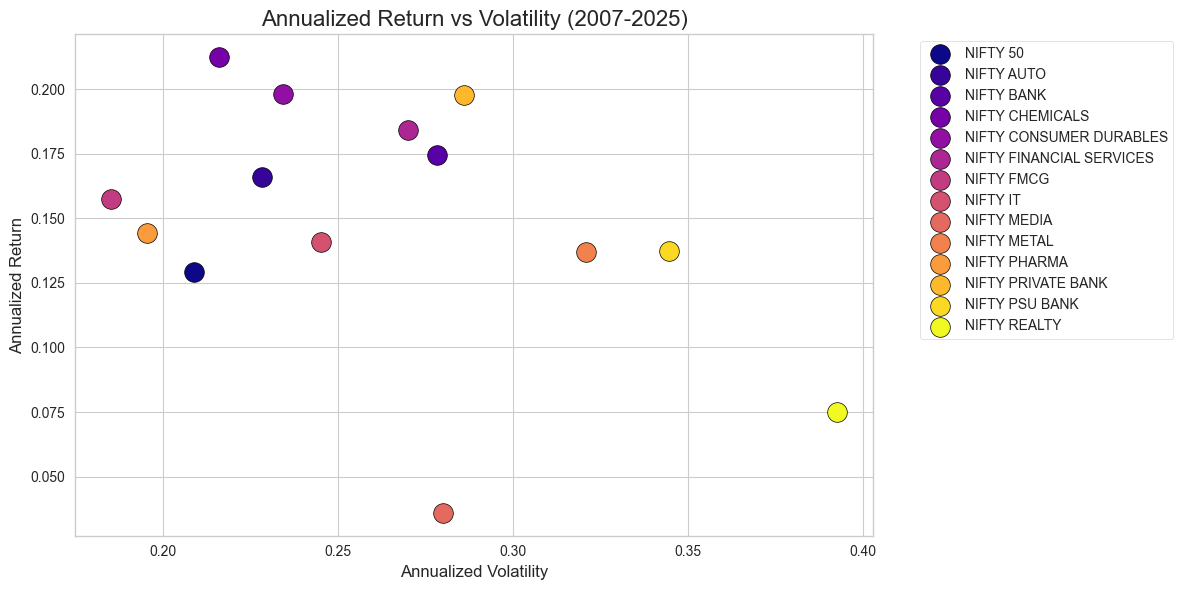

In [15]:
import matplotlib.cm as cm

# Number of sectors
n_sectors = len(risk_metrics)

# Create a vibrant gradient color palette
gradient_colors = cm.get_cmap('plasma', n_sectors)  # 'plasma' gives a bright gradient

# (a) Maximum Drawdown with gradient colors
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="Max Drawdown",
    data=risk_metrics,
    palette=[gradient_colors(i/n_sectors) for i in range(n_sectors)]
)
plt.xticks(rotation=45, ha='right')
plt.title("Maximum Drawdown (2007-2025) per Sector", fontsize=16)
plt.ylabel("Drawdown")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (b) Sharpe Ratio with gradient colors
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="Sharpe Ratio",
    data=risk_metrics,
    palette=[gradient_colors(i/n_sectors) for i in range(n_sectors)]
)
plt.xticks(rotation=45, ha='right')
plt.title("Sharpe Ratio (2007-2025) per Sector", fontsize=16)
plt.ylabel("Sharpe Ratio")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (c) VaR & CVaR with gradient colors
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="VaR (5%)",
    data=risk_metrics,
    palette=[gradient_colors(i/n_sectors) for i in range(n_sectors)],
    label="VaR (5%)"
)
sns.barplot(
    x="Sector",
    y="CVaR (5%)",
    data=risk_metrics,
    palette=[gradient_colors(i/n_sectors) for i in range(n_sectors)],
    alpha=0.7,
    label="CVaR (5%)"
)
plt.xticks(rotation=45, ha='right')
plt.title("VaR & CVaR (5%) per Sector (2007-2025)", fontsize=16)
plt.ylabel("Daily Loss")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (d) Annualized Return vs Volatility scatter with vibrant colors
plt.figure(figsize=(12,6))
for i, sector in enumerate(risk_metrics['Sector']):
    plt.scatter(
        risk_metrics.loc[i, 'Annualized Volatility'],
        risk_metrics.loc[i, 'Annualized Return'],
        color=gradient_colors(i/n_sectors),
        s=200,
        label=sector,
        edgecolor='black'
    )
plt.title("Annualized Return vs Volatility (2007-2025)", fontsize=16)
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2768343414.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2768343414.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


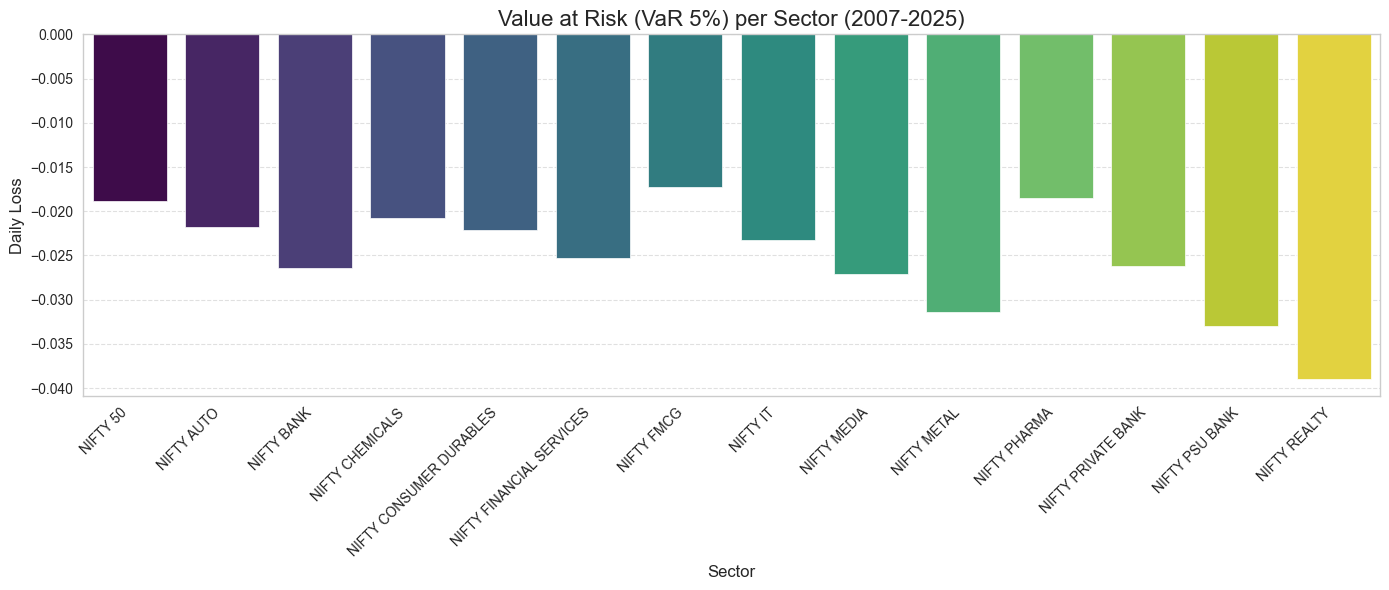

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2768343414.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\2768343414.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


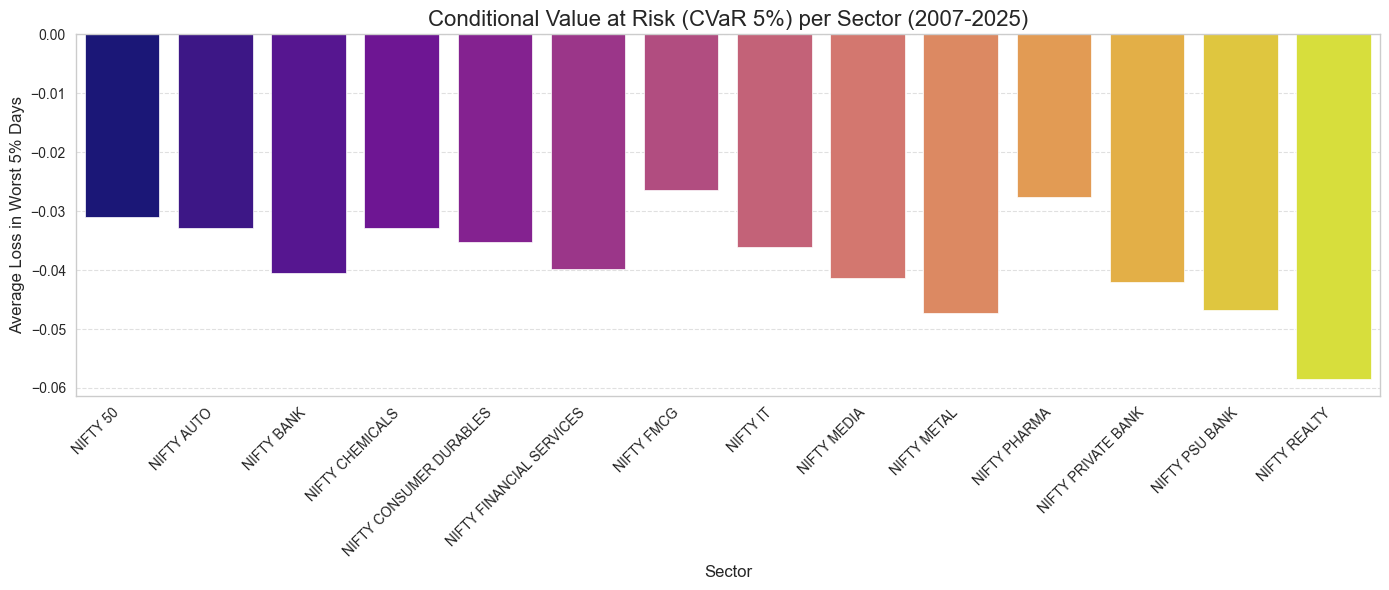

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Set style
sns.set_style("whitegrid")

n_sectors = len(risk_metrics)

# Create a vibrant gradient color palette
gradient_colors_var = cm.viridis(np.linspace(0, 1, n_sectors))
gradient_colors_cvar = cm.plasma(np.linspace(0, 1, n_sectors))

# ------------------------------
# VaR (5%) bar plot
# ------------------------------
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="VaR (5%)",
    data=risk_metrics,
    palette=gradient_colors_var
)
plt.xticks(rotation=45, ha='right')
plt.title("Value at Risk (VaR 5%) per Sector (2007-2025)", fontsize=16)
plt.ylabel("Daily Loss")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------
# CVaR (5%) bar plot
# ------------------------------
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="CVaR (5%)",
    data=risk_metrics,
    palette=gradient_colors_cvar
)
plt.xticks(rotation=45, ha='right')
plt.title("Conditional Value at Risk (CVaR 5%) per Sector (2007-2025)", fontsize=16)
plt.ylabel("Average Loss in Worst 5% Days")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1798254174.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1798254174.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


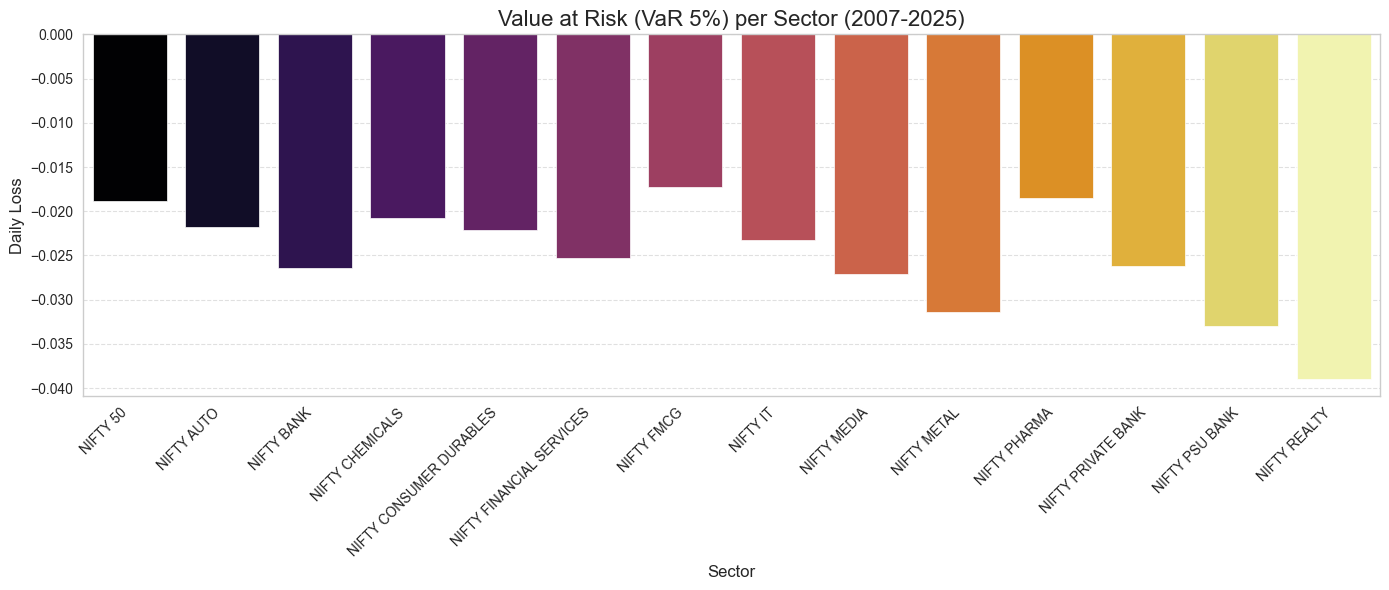

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1798254174.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\1798254174.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


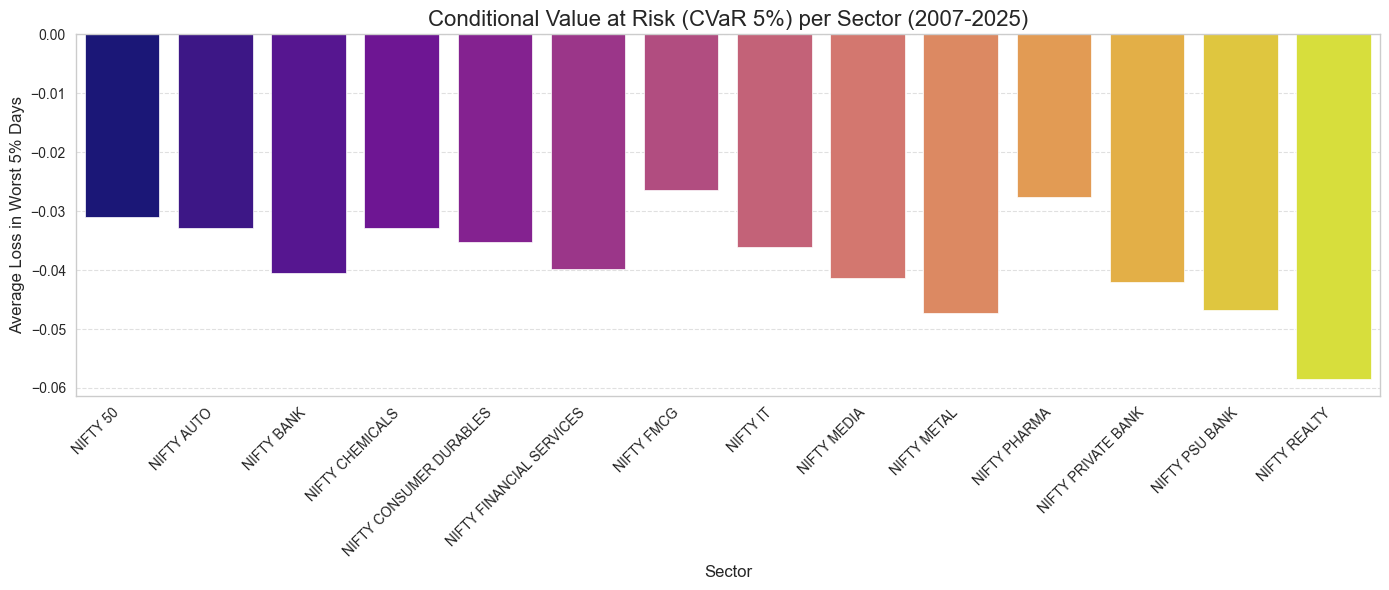

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

n_sectors = len(risk_metrics)

# Gradient color palettes for VaR and CVaR
gradient_colors_var = cm.inferno(np.linspace(0, 1, n_sectors))   # vibrant orange-red-yellow
gradient_colors_cvar = cm.plasma(np.linspace(0, 1, n_sectors))   # vibrant purple-yellow

# ------------------------------
# VaR (5%) bar plot
# ------------------------------
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="VaR (5%)",
    data=risk_metrics,
    palette=gradient_colors_var
)
plt.xticks(rotation=45, ha='right')
plt.title("Value at Risk (VaR 5%) per Sector (2007-2025)", fontsize=16)
plt.ylabel("Daily Loss")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------------------
# CVaR (5%) bar plot
# ------------------------------
plt.figure(figsize=(14,6))
sns.barplot(
    x="Sector",
    y="CVaR (5%)",
    data=risk_metrics,
    palette=gradient_colors_cvar
)
plt.xticks(rotation=45, ha='right')
plt.title("Conditional Value at Risk (CVaR 5%) per Sector (2007-2025)", fontsize=16)
plt.ylabel("Average Loss in Worst 5% Days")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3744599135.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(sectors, rotation=45, ha='right')
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3744599135.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(sectors, rotation=45, ha='right')
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3744599135.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(sectors, rotation=45, ha='right')
C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3744599135.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xtickl

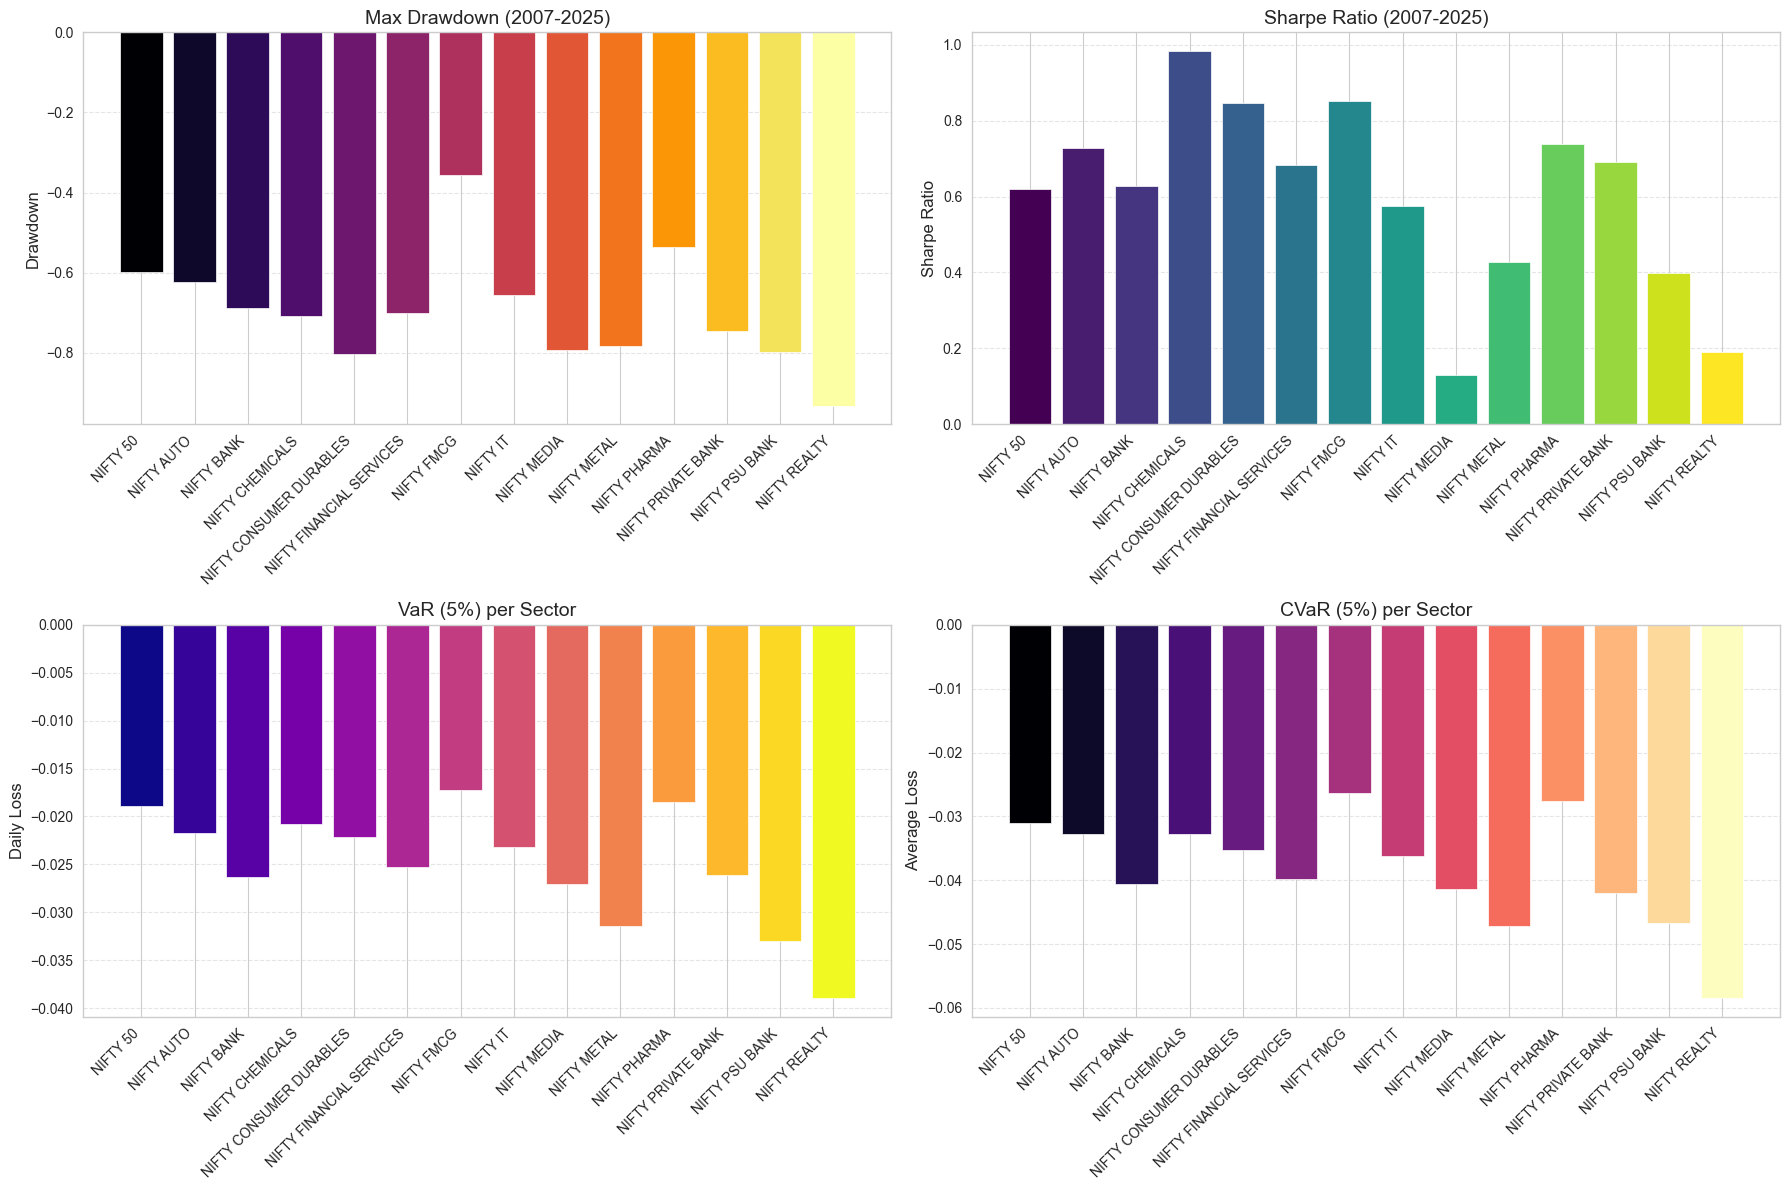

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
n_sectors = len(risk_metrics)
sectors = risk_metrics['Sector']
x = np.arange(n_sectors)

# Gradient color palettes for each metric
colors_drawdown = cm.inferno(np.linspace(0,1,n_sectors))
colors_sharpe   = cm.viridis(np.linspace(0,1,n_sectors))
colors_var      = cm.plasma(np.linspace(0,1,n_sectors))
colors_cvar     = cm.magma(np.linspace(0,1,n_sectors))

fig, axes = plt.subplots(2,2, figsize=(18,12))

# ------------------- Max Drawdown -------------------
axes[0,0].bar(sectors, risk_metrics['Max Drawdown'], color=colors_drawdown)
axes[0,0].set_title("Max Drawdown (2007-2025)", fontsize=14)
axes[0,0].set_ylabel("Drawdown")
axes[0,0].set_xticklabels(sectors, rotation=45, ha='right')
axes[0,0].grid(axis='y', linestyle='--', alpha=0.5)

# ------------------- Sharpe Ratio -------------------
axes[0,1].bar(sectors, risk_metrics['Sharpe Ratio'], color=colors_sharpe)
axes[0,1].set_title("Sharpe Ratio (2007-2025)", fontsize=14)
axes[0,1].set_ylabel("Sharpe Ratio")
axes[0,1].set_xticklabels(sectors, rotation=45, ha='right')
axes[0,1].grid(axis='y', linestyle='--', alpha=0.5)

# ------------------- VaR (5%) -------------------
axes[1,0].bar(sectors, risk_metrics['VaR (5%)'], color=colors_var)
axes[1,0].set_title("VaR (5%) per Sector", fontsize=14)
axes[1,0].set_ylabel("Daily Loss")
axes[1,0].set_xticklabels(sectors, rotation=45, ha='right')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.5)

# ------------------- CVaR (5%) -------------------
axes[1,1].bar(sectors, risk_metrics['CVaR (5%)'], color=colors_cvar)
axes[1,1].set_title("CVaR (5%) per Sector", fontsize=14)
axes[1,1].set_ylabel("Average Loss")
axes[1,1].set_xticklabels(sectors, rotation=45, ha='right')
axes[1,1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


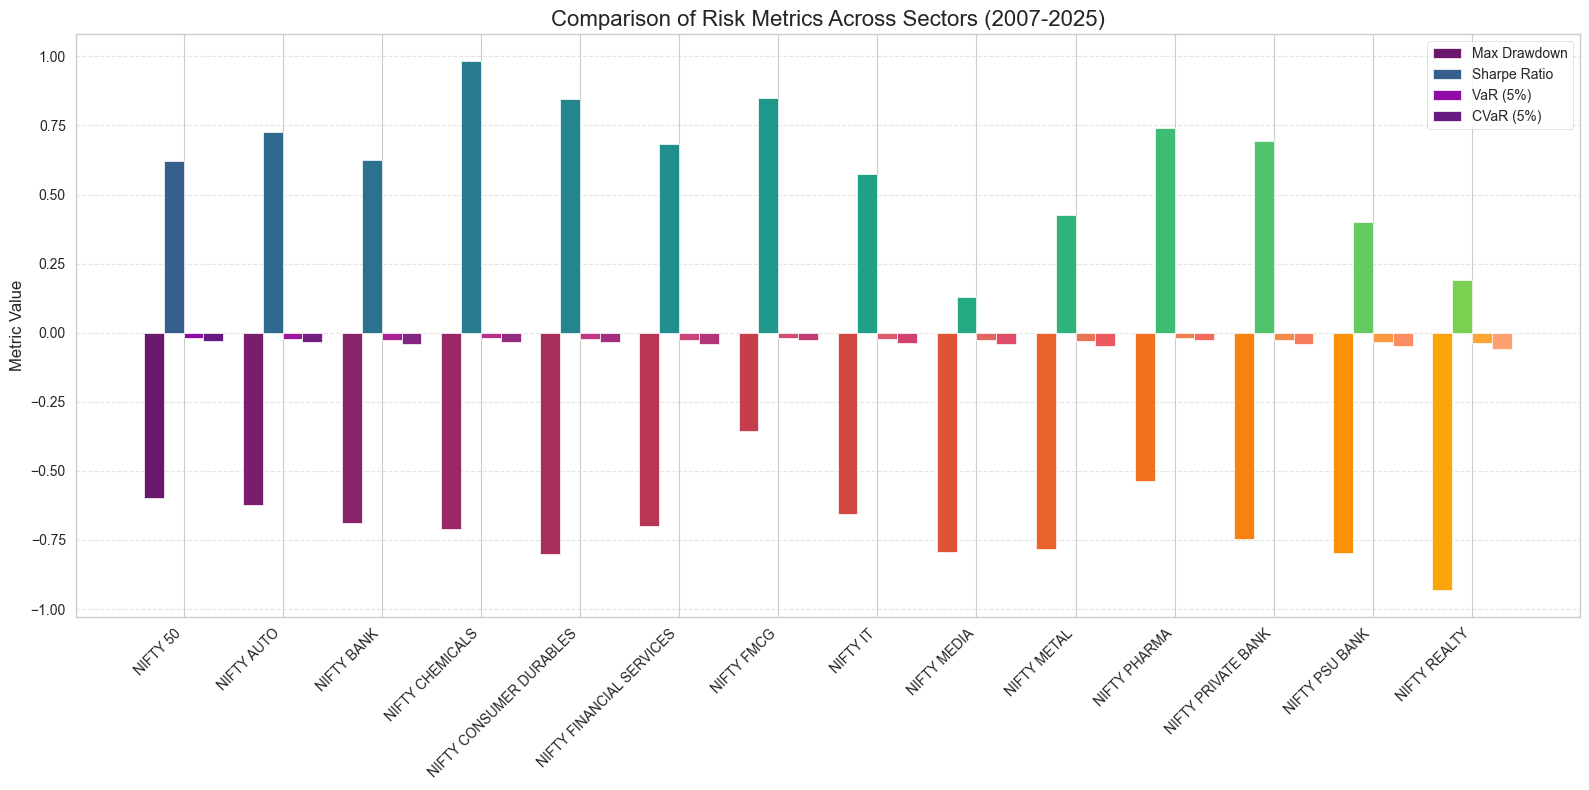

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

sectors = risk_metrics['Sector']
n_sectors = len(sectors)
x = np.arange(n_sectors)
width = 0.2  # width of each bar

# Create gradient shades for each metric
colors_drawdown = cm.inferno(np.linspace(0.3,0.8,n_sectors))
colors_sharpe   = cm.viridis(np.linspace(0.3,0.8,n_sectors))
colors_var      = cm.plasma(np.linspace(0.3,0.8,n_sectors))
colors_cvar     = cm.magma(np.linspace(0.3,0.8,n_sectors))

fig, ax = plt.subplots(figsize=(16,8))

# Plot grouped bars
bars1 = ax.bar(x - 1.5*width, risk_metrics['Max Drawdown'], width, color=colors_drawdown)
bars2 = ax.bar(x - 0.5*width, risk_metrics['Sharpe Ratio'], width, color=colors_sharpe)
bars3 = ax.bar(x + 0.5*width, risk_metrics['VaR (5%)'], width, color=colors_var)
bars4 = ax.bar(x + 1.5*width, risk_metrics['CVaR (5%)'], width, color=colors_cvar)

# Labels & title
ax.set_xticks(x)
ax.set_xticklabels(sectors, rotation=45, ha='right')
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Risk Metrics Across Sectors (2007-2025)", fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend (one per metric)
ax.legend([bars1, bars2, bars3, bars4], ['Max Drawdown','Sharpe Ratio','VaR (5%)','CVaR (5%)'])

plt.tight_layout()
plt.show()


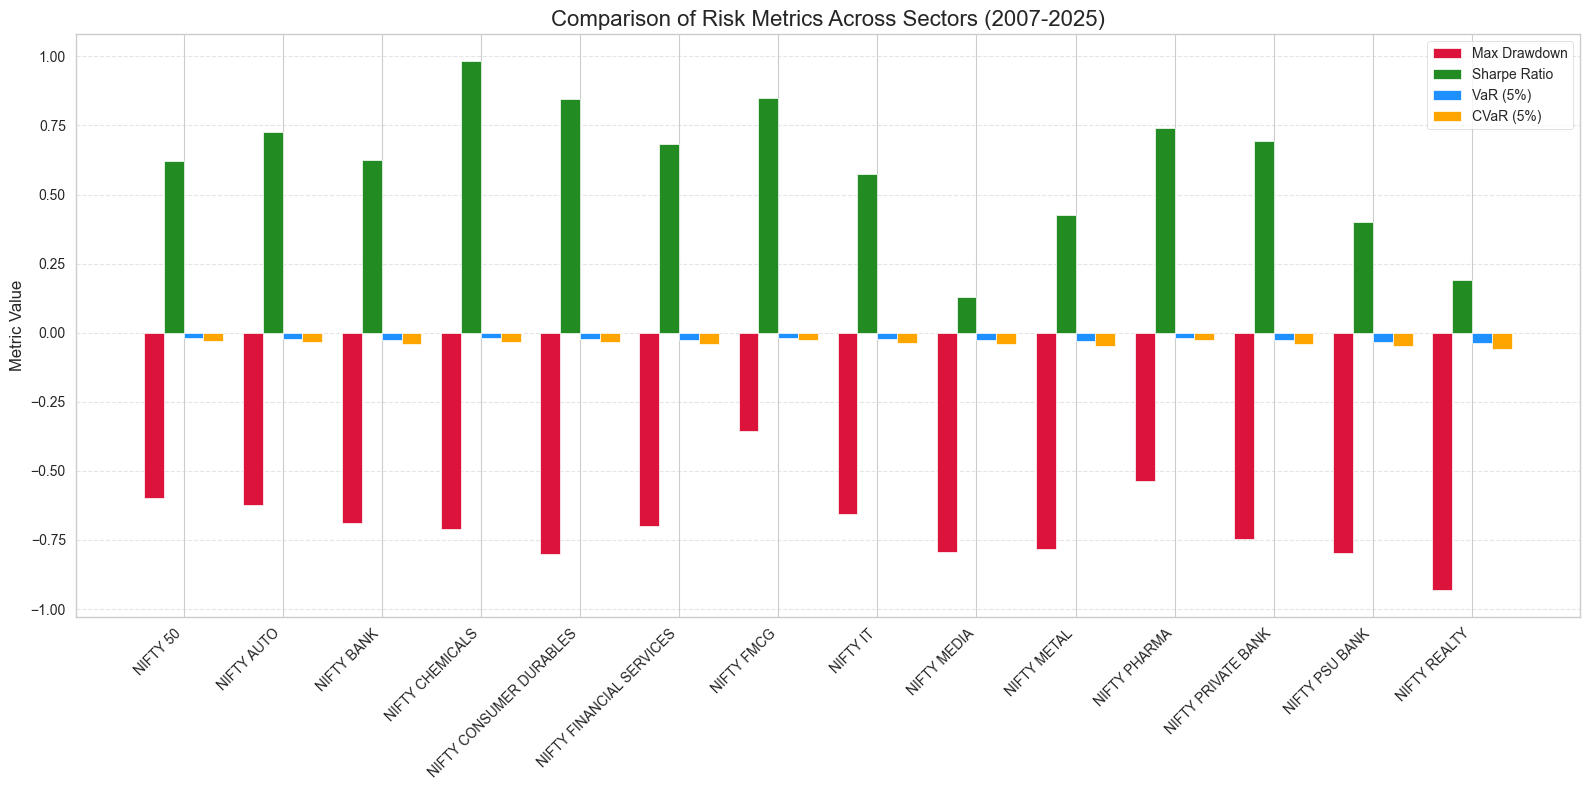

In [21]:
import matplotlib.pyplot as plt
import numpy as np

sectors = risk_metrics['Sector']
n_sectors = len(sectors)
x = np.arange(n_sectors)
width = 0.2  # width of each bar

# Solid colors for each metric
color_drawdown = 'crimson'
color_sharpe   = 'forestgreen'
color_var      = 'dodgerblue'
color_cvar     = 'orange'

fig, ax = plt.subplots(figsize=(16,8))

# Plot grouped bars
bars1 = ax.bar(x - 1.5*width, risk_metrics['Max Drawdown'], width, color=color_drawdown)
bars2 = ax.bar(x - 0.5*width, risk_metrics['Sharpe Ratio'], width, color=color_sharpe)
bars3 = ax.bar(x + 0.5*width, risk_metrics['VaR (5%)'], width, color=color_var)
bars4 = ax.bar(x + 1.5*width, risk_metrics['CVaR (5%)'], width, color=color_cvar)

# Labels & title
ax.set_xticks(x)
ax.set_xticklabels(sectors, rotation=45, ha='right')
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Risk Metrics Across Sectors (2007-2025)", fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
ax.legend([bars1, bars2, bars3, bars4], ['Max Drawdown','Sharpe Ratio','VaR (5%)','CVaR (5%)'])

plt.tight_layout()
plt.show()


⚠️ Skipping Sector_Extended_Risk_Metrics_2007_2025: Missing 'Date' or 'Close'
✅ Volatility metrics saved to C:\Users\Shobith\PycharmProjects\finalyr\index data updated\Sector_Volatility_2007_2025.csv


C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3755028267.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="Annualized Volatility", data=vol_df, palette="Blues_r")


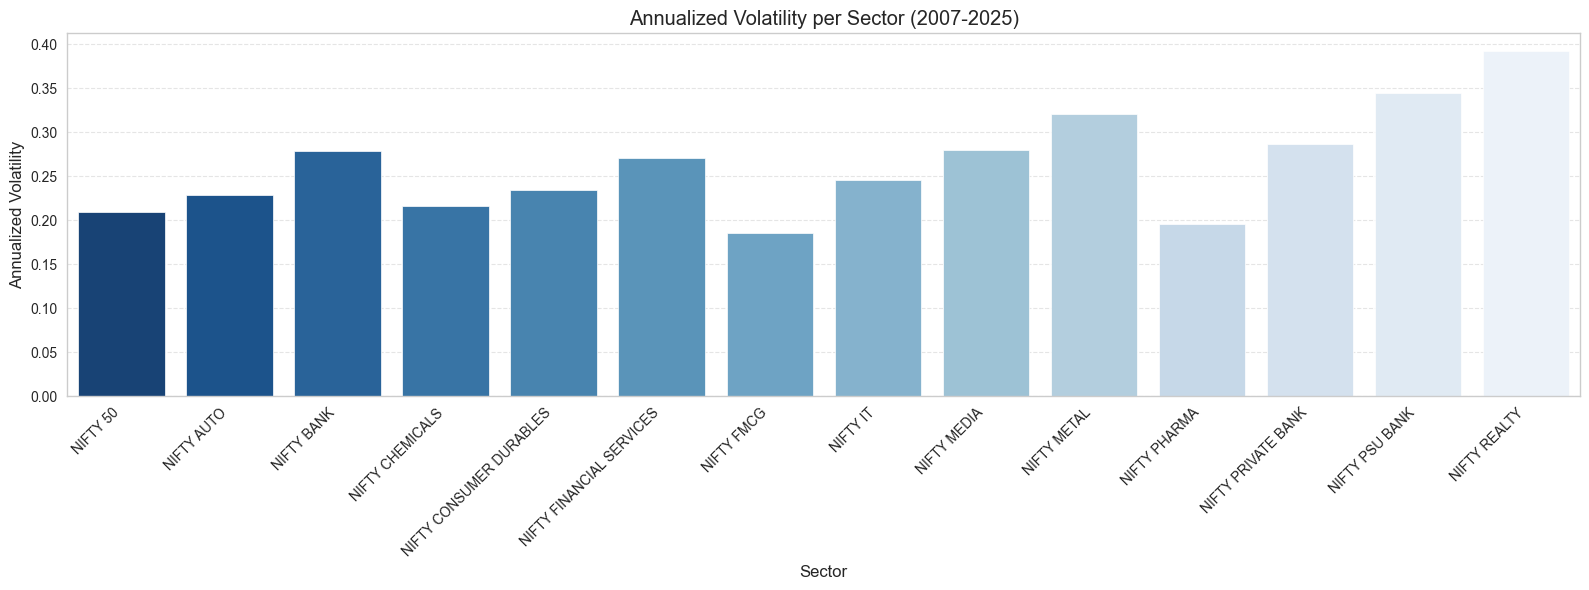

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\3755028267.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="GARCH Annualized Volatility", data=vol_df, palette="Oranges_r")


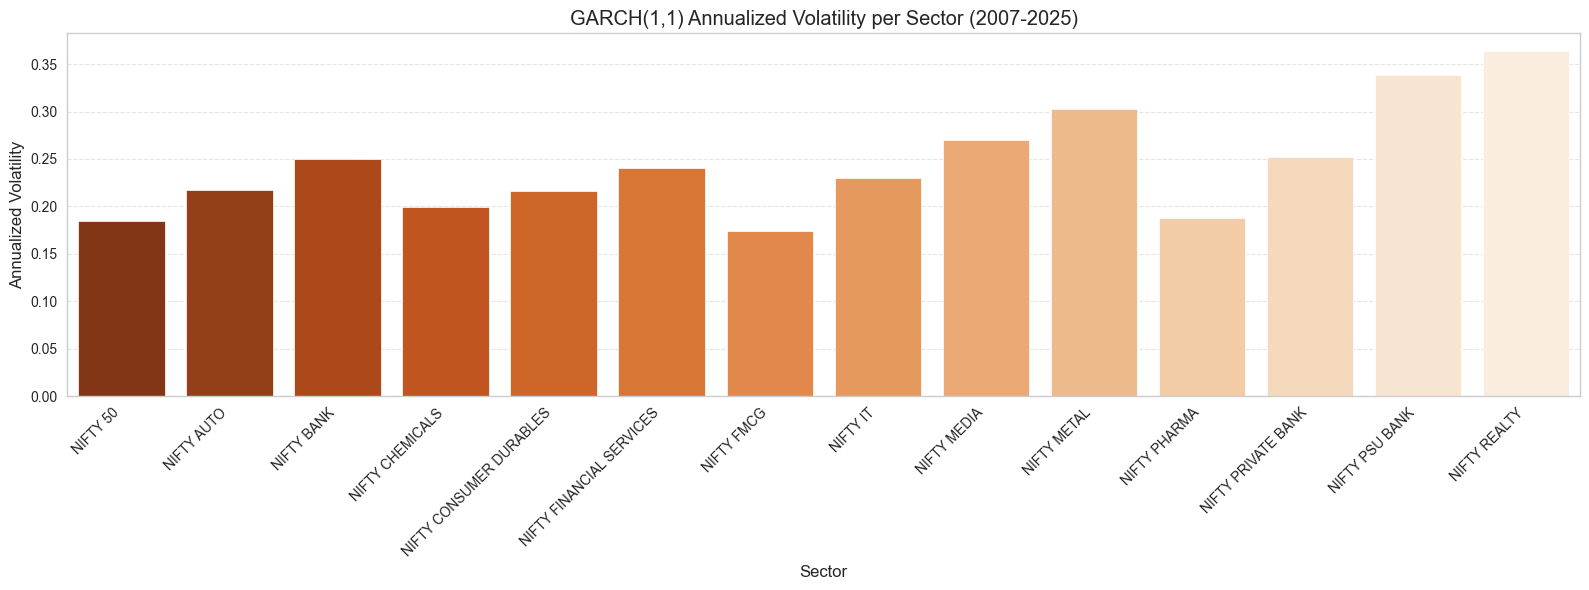

In [28]:
# =========================================
# VOLATILITY METRICS FOR ALL SECTORS
# =========================================

import pandas as pd
import numpy as np
import glob, os
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ==============================
# 1️⃣ Load CSV files
# ==============================
data_folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# ==============================
# 2️⃣ Function to calculate volatility
# ==============================
def calculate_volatility(df, sector_name):
    # Normalize column names
    df.columns = df.columns.str.strip().str.lower()

    if 'date' not in df.columns or 'close' not in df.columns:
        print(f"⚠️ Skipping {sector_name}: Missing 'Date' or 'Close'")
        return None

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')

    # Filter 2007-2025
    df = df[(df['date'].dt.year >= 2007) & (df['date'].dt.year <= 2025)]

    # Daily returns
    df['return'] = df['close'].pct_change().dropna()

    # Historical Volatility
    daily_vol = df['return'].std()
    annual_vol = daily_vol * np.sqrt(252)

    # GARCH(1,1) Volatility
    garch_model = arch_model(df['return'].dropna()*100, vol='Garch', p=1, q=1, dist='normal')
    garch_res = garch_model.fit(disp='off')
    garch_forecast = garch_res.conditional_volatility / 100
    garch_annual_vol = garch_forecast.mean() * np.sqrt(252)

    return {
        "Sector": sector_name,
        "Daily Volatility": daily_vol,
        "Annualized Volatility": annual_vol,
        "GARCH Annualized Volatility": garch_annual_vol
    }

# ==============================
# 3️⃣ Loop through all CSV files
# ==============================
vol_metrics = []

for file in csv_files:
    sector_name = os.path.basename(file).replace(".csv","")
    df = pd.read_csv(file)
    metrics = calculate_volatility(df, sector_name)
    if metrics:
        vol_metrics.append(metrics)

vol_df = pd.DataFrame(vol_metrics)

# Save to CSV
output_file = os.path.join(data_folder, "Sector_Volatility_2007_2025.csv")
vol_df.to_csv(output_file, index=False)
print(f"✅ Volatility metrics saved to {output_file}")

# ==============================
# 4️⃣ Visualization
# ==============================
plt.figure(figsize=(16,6))
sns.barplot(x="Sector", y="Annualized Volatility", data=vol_df, palette="Blues_r")
plt.xticks(rotation=45, ha='right')
plt.title("Annualized Volatility per Sector (2007-2025)")
plt.ylabel("Annualized Volatility")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(x="Sector", y="GARCH Annualized Volatility", data=vol_df, palette="Oranges_r")
plt.xticks(rotation=45, ha='right')
plt.title("GARCH(1,1) Annualized Volatility per Sector (2007-2025)")
plt.ylabel("Annualized Volatility")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\21341365.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="Annualized Volatility", data=vol_df, palette="Blues_r")


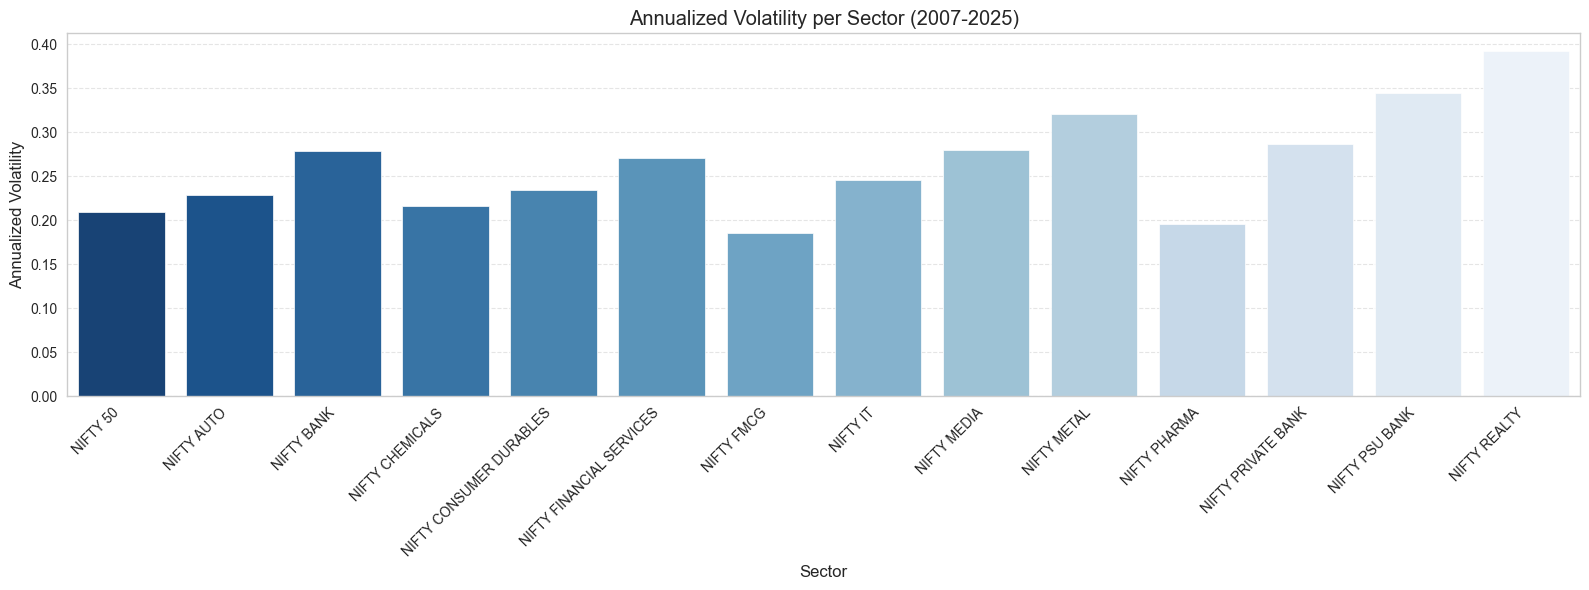

C:\Users\Shobith\AppData\Local\Temp\ipykernel_32684\21341365.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sector", y="GARCH Annualized Volatility", data=vol_df, palette="Oranges_r")


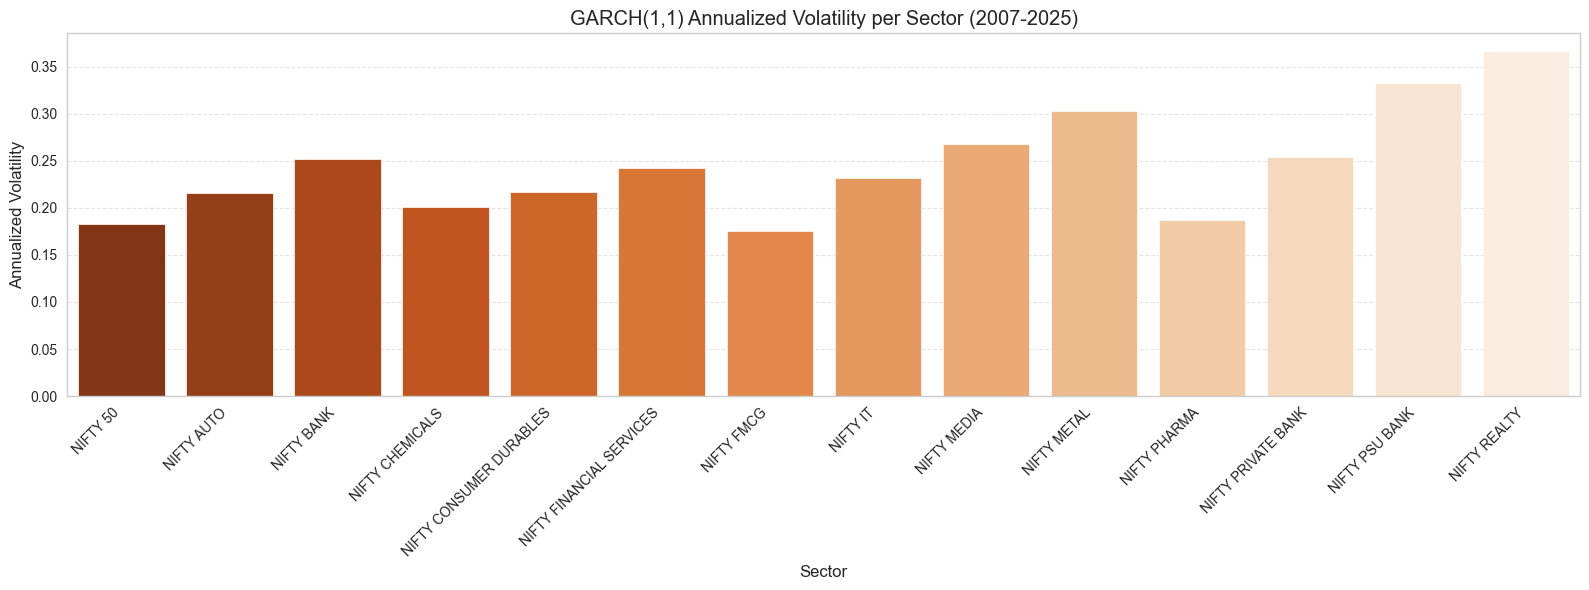

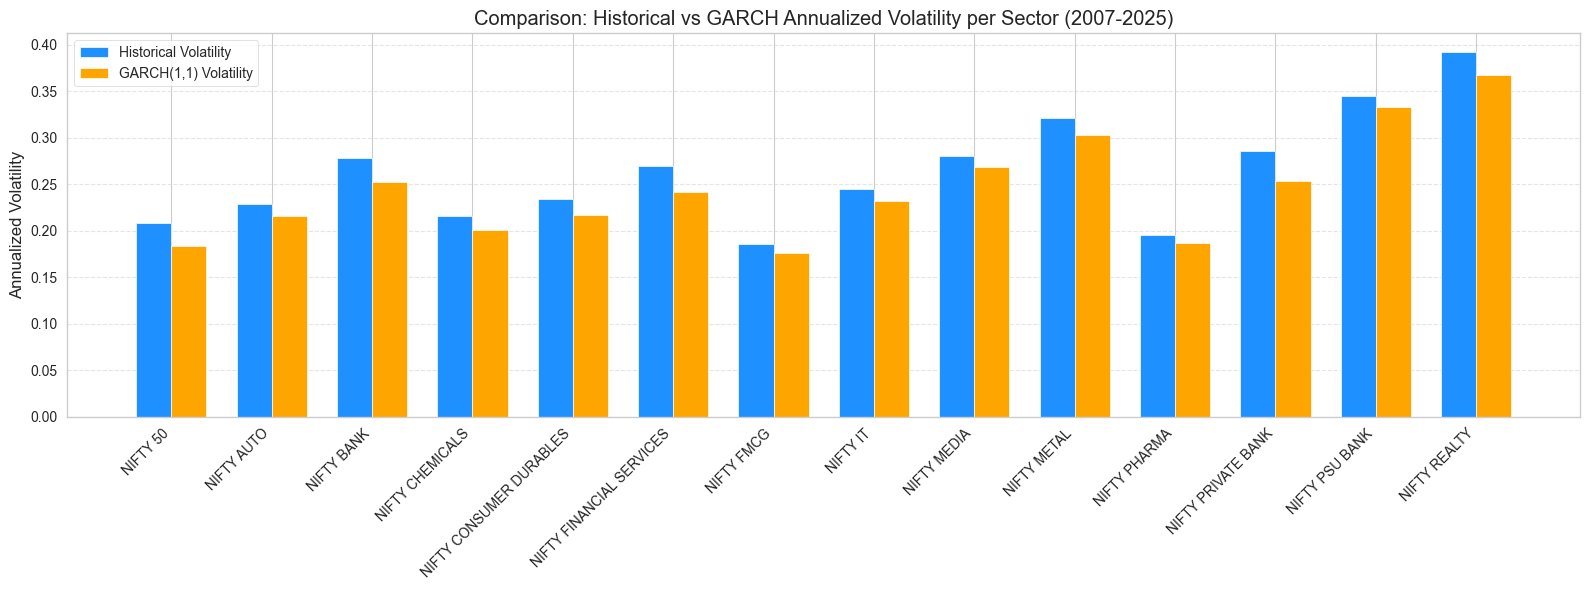

In [32]:
# ==============================
# 4️⃣ Visualization
# ==============================
import numpy as np

# (a) Historical Annualized Volatility
plt.figure(figsize=(16,6))
sns.barplot(x="Sector", y="Annualized Volatility", data=vol_df, palette="Blues_r")
plt.xticks(rotation=45, ha='right')
plt.title("Annualized Volatility per Sector (2007-2025)")
plt.ylabel("Annualized Volatility")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (b) GARCH(1,1) Annualized Volatility
plt.figure(figsize=(16,6))
sns.barplot(x="Sector", y="GARCH Annualized Volatility", data=vol_df, palette="Oranges_r")
plt.xticks(rotation=45, ha='right')
plt.title("GARCH(1,1) Annualized Volatility per Sector (2007-2025)")
plt.ylabel("Annualized Volatility")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (c) Comparison Bar Plot: Historical vs GARCH
x = np.arange(len(vol_df))
width = 0.35  # width of bars

plt.figure(figsize=(16,6))
plt.bar(x - width/2, vol_df['Annualized Volatility'], width, label='Historical Volatility', color='dodgerblue')
plt.bar(x + width/2, vol_df['GARCH Annualized Volatility'], width, label='GARCH(1,1) Volatility', color='orange')
plt.xticks(x, vol_df['Sector'], rotation=45, ha='right')
plt.ylabel("Annualized Volatility")
plt.title("Comparison: Historical vs GARCH Annualized Volatility per Sector (2007-2025)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


⚠️ Skipping Sector_Extended_Risk_Metrics_2007_2025: Missing 'Date' or 'Close'
⚠️ Skipping Sector_Volatility_2007_2025: Missing 'Date' or 'Close'
✅ Volatility metrics saved to C:\Users\Shobith\PycharmProjects\finalyr\index data updated\Sector_Volatility_2007_2025.csv


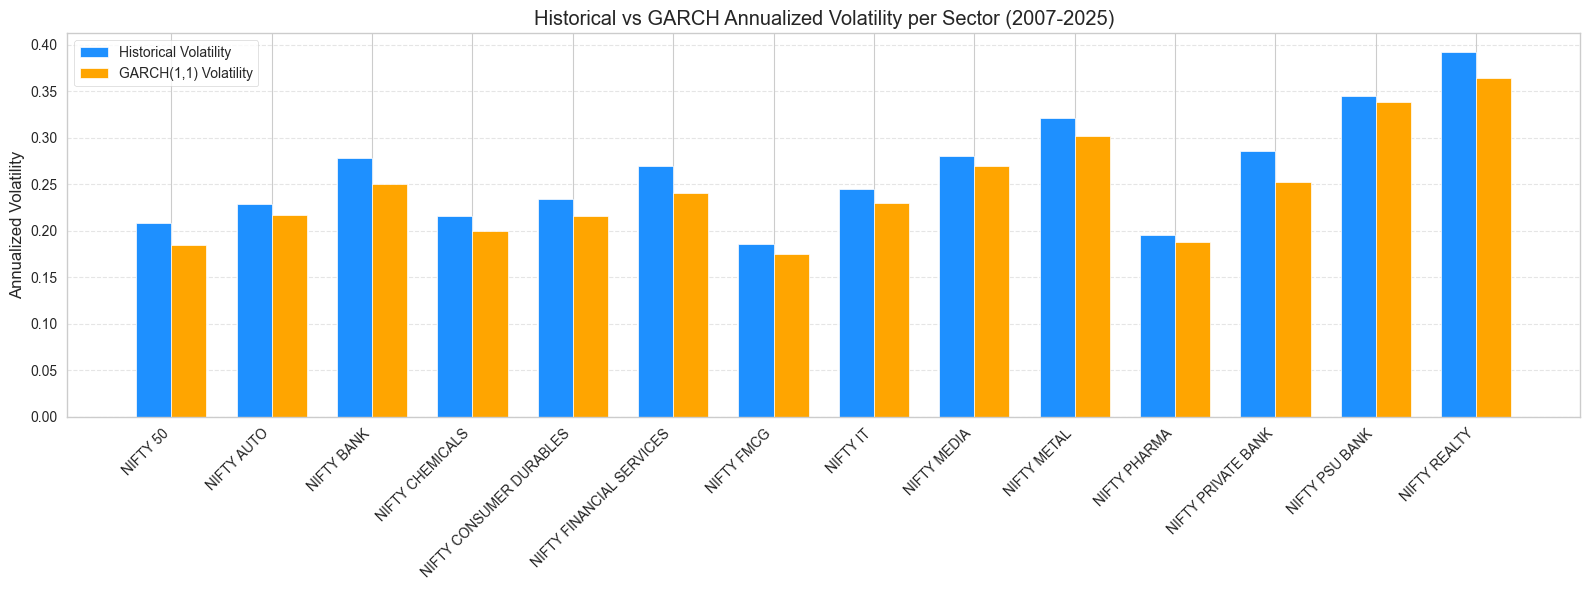

In [29]:
# =========================================
# VOLATILITY COMPARISON: HISTORICAL vs GARCH
# =========================================

import pandas as pd
import numpy as np
import glob, os
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ==============================
# 1️⃣ Load CSV files
# ==============================
data_folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# ==============================
# 2️⃣ Function to calculate volatility
# ==============================
def calculate_volatility(df, sector_name):
    df.columns = df.columns.str.strip().str.lower()

    if 'date' not in df.columns or 'close' not in df.columns:
        print(f"⚠️ Skipping {sector_name}: Missing 'Date' or 'Close'")
        return None

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')

    # Filter 2007-2025
    df = df[(df['date'].dt.year >= 2007) & (df['date'].dt.year <= 2025)]

    # Daily returns
    df['return'] = df['close'].pct_change().dropna()

    # Historical Volatility
    daily_vol = df['return'].std()
    annual_vol = daily_vol * np.sqrt(252)

    # GARCH(1,1) Volatility
    garch_model = arch_model(df['return'].dropna()*100, vol='Garch', p=1, q=1, dist='normal')
    garch_res = garch_model.fit(disp='off')
    garch_forecast = garch_res.conditional_volatility / 100
    garch_annual_vol = garch_forecast.mean() * np.sqrt(252)

    return {
        "Sector": sector_name,
        "Annualized Volatility": annual_vol,
        "GARCH Annualized Volatility": garch_annual_vol
    }

# ==============================
# 3️⃣ Loop through CSV files
# ==============================
vol_metrics = []

for file in csv_files:
    sector_name = os.path.basename(file).replace(".csv","")
    df = pd.read_csv(file)
    metrics = calculate_volatility(df, sector_name)
    if metrics:
        vol_metrics.append(metrics)

vol_df = pd.DataFrame(vol_metrics)

# Save CSV
output_file = os.path.join(data_folder, "Sector_Volatility_2007_2025.csv")
vol_df.to_csv(output_file, index=False)
print(f"✅ Volatility metrics saved to {output_file}")

# ==============================
# 4️⃣ Combined Bar Plot: Historical vs GARCH
# ==============================
x = np.arange(len(vol_df))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, vol_df['Annualized Volatility'], width, label='Historical Volatility', color='dodgerblue')
plt.bar(x + width/2, vol_df['GARCH Annualized Volatility'], width, label='GARCH(1,1) Volatility', color='orange')
plt.xticks(x, vol_df['Sector'], rotation=45, ha='right')
plt.ylabel("Annualized Volatility")
plt.title("Historical vs GARCH Annualized Volatility per Sector (2007-2025)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


⚠️ Skipping Sector_Extended_Risk_Metrics_2007_2025: Missing 'Date' or 'Close'
⚠️ Skipping Sector_Volatility_2007_2025: Missing 'Date' or 'Close'
⚠️ Skipping Sector_Volatility_2007_2025_ImprovedGARCH: Missing 'Date' or 'Close'
✅ Volatility metrics saved.
MSE: 0.000415, MAE: 0.018425


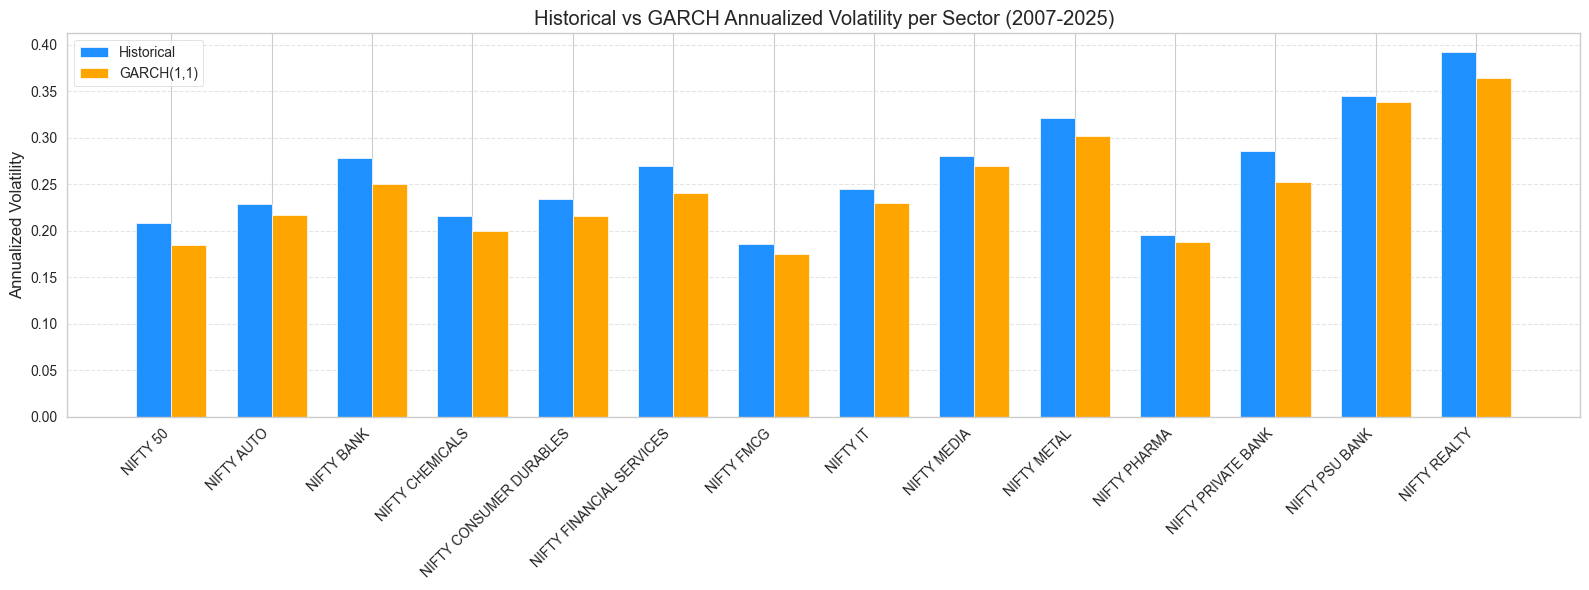

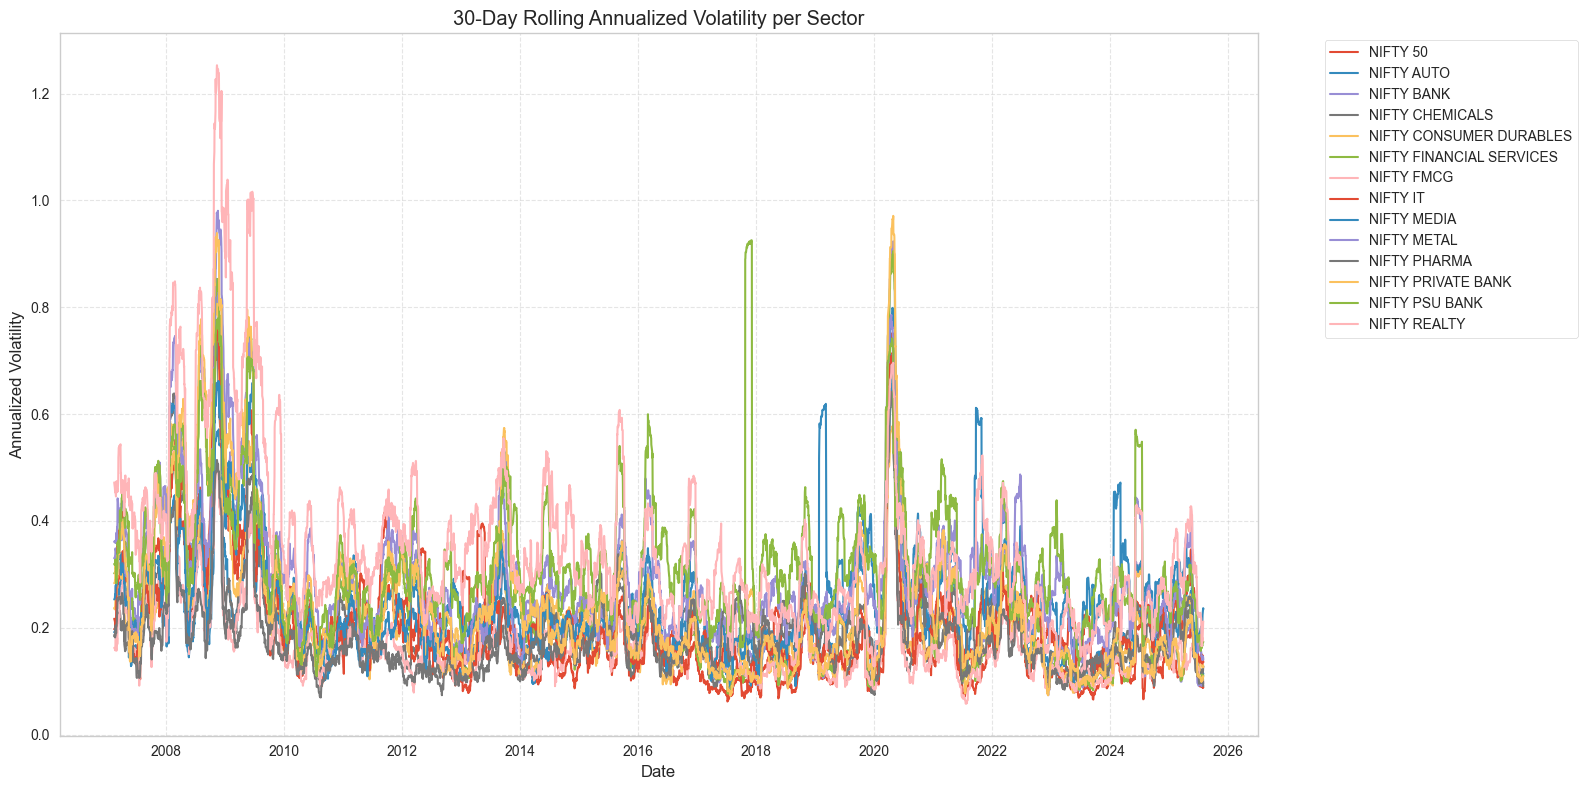

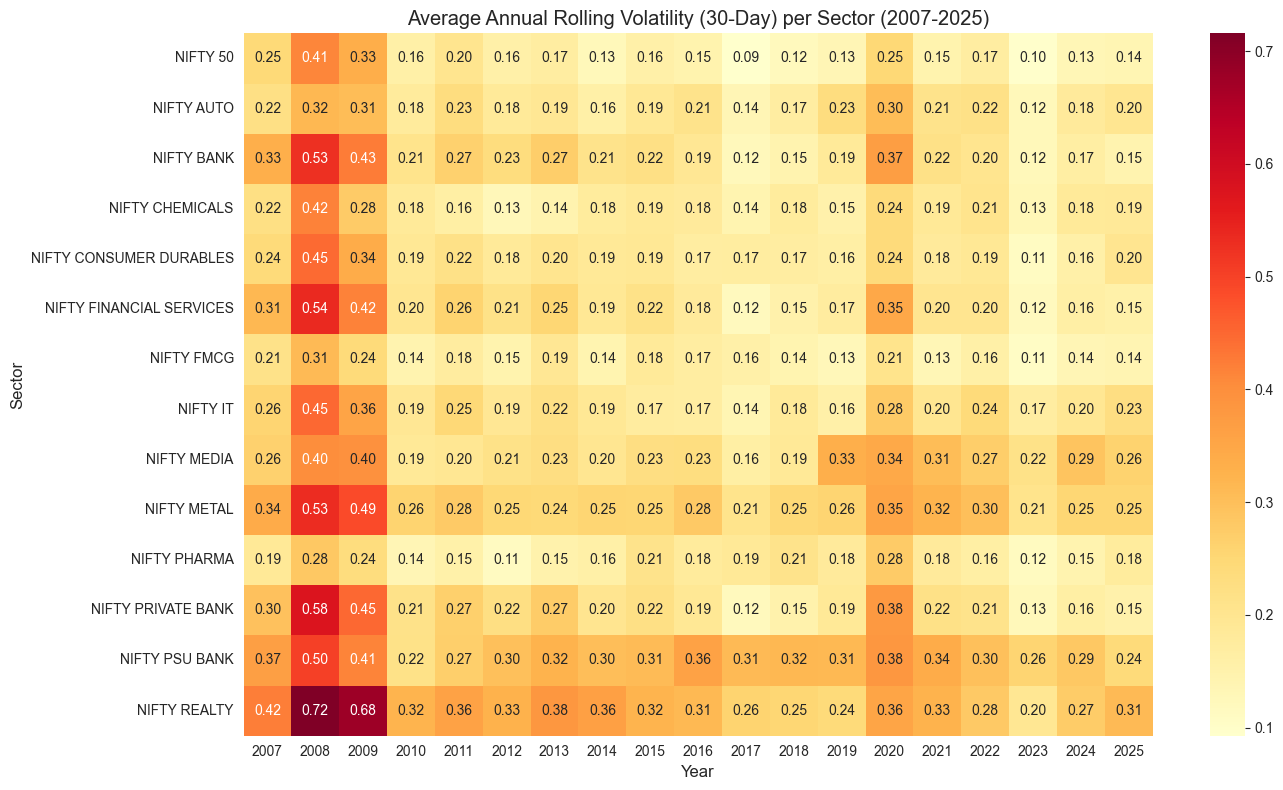

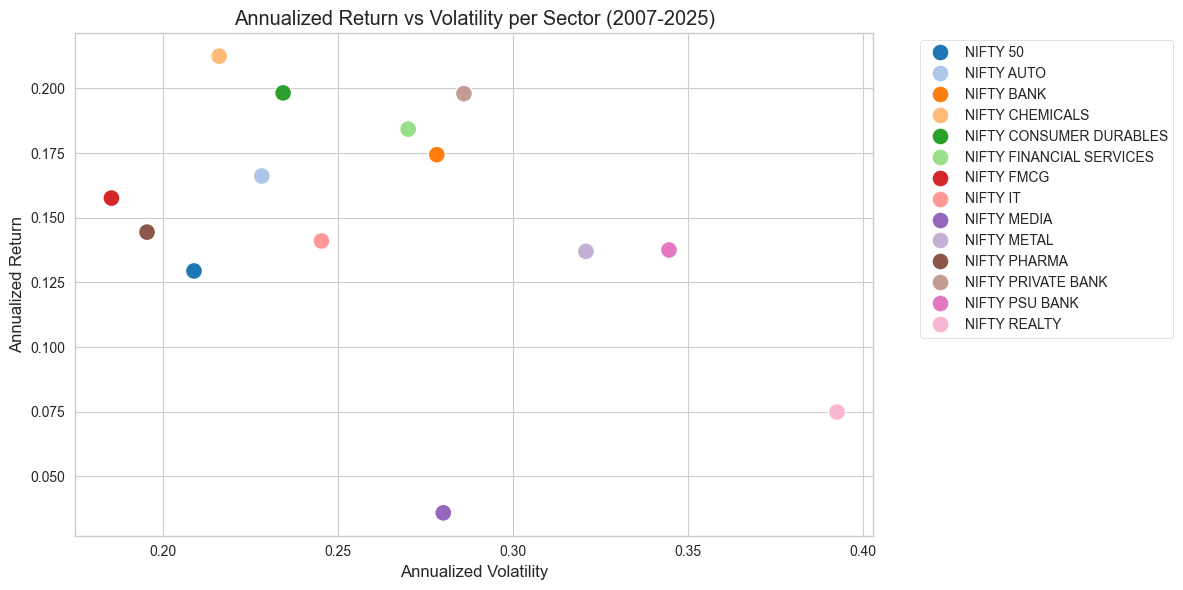

In [34]:
# =========================================
# DETAILED VOLATILITY ANALYSIS FOR ALL SECTORS
# =========================================

import pandas as pd
import numpy as np
import glob, os
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

# ==============================
# 1️⃣ Load CSV files
# ==============================
data_folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# ==============================
# 2️⃣ Function to calculate volatility metrics
# ==============================
def calculate_volatility(df, sector_name):
    # Normalize column names
    df.columns = df.columns.str.strip().str.lower()

    if 'date' not in df.columns or 'close' not in df.columns:
        print(f"⚠️ Skipping {sector_name}: Missing 'Date' or 'Close'")
        return None

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')

    # Filter 2007-2025
    df = df[(df['date'].dt.year >= 2007) & (df['date'].dt.year <= 2025)]

    # Daily returns
    df['return'] = df['close'].pct_change()
    df = df.dropna()

    # Historical Volatility
    daily_vol = df['return'].std()
    annual_vol = daily_vol * np.sqrt(252)

    # Rolling 30-day volatility
    df['rolling_vol_30d'] = df['return'].rolling(window=30).std() * np.sqrt(252)

    # GARCH(1,1) Volatility
    garch_model = arch_model(df['return']*100, vol='Garch', p=1, q=1, dist='normal')
    garch_res = garch_model.fit(disp='off')
    garch_forecast = garch_res.conditional_volatility / 100
    garch_annual_vol = garch_forecast.mean() * np.sqrt(252)

    return {
        "Sector": sector_name,
        "Annualized Volatility": annual_vol,
        "GARCH Annualized Volatility": garch_annual_vol,
        "Rolling Volatility 30D": df['rolling_vol_30d'],
        "Dates": df['date']
    }

# ==============================
# 3️⃣ Loop through CSV files
# ==============================
vol_metrics = []
rolling_dict = {}  # to store rolling volatility series for plotting

for file in csv_files:
    sector_name = os.path.basename(file).replace(".csv","")
    df = pd.read_csv(file)
    metrics = calculate_volatility(df, sector_name)
    if metrics:
        vol_metrics.append({
            "Sector": metrics["Sector"],
            "Annualized Volatility": metrics["Annualized Volatility"],
            "GARCH Annualized Volatility": metrics["GARCH Annualized Volatility"]
        })
        rolling_dict[metrics["Sector"]] = pd.DataFrame({
            "Date": metrics["Dates"],
            "Rolling Volatility": metrics["Rolling Volatility 30D"]
        })

vol_df = pd.DataFrame(vol_metrics)

# Save overall volatility metrics
vol_df.to_csv(os.path.join(data_folder, "Sector_Volatility_2007_2025.csv"), index=False)
print(f"✅ Volatility metrics saved.")

# ==============================
# 4️⃣ Evaluation metrics: Historical vs GARCH
# ==============================
mse = mean_squared_error(vol_df['Annualized Volatility'], vol_df['GARCH Annualized Volatility'])
mae = mean_absolute_error(vol_df['Annualized Volatility'], vol_df['GARCH Annualized Volatility'])
print(f"MSE: {mse:.6f}, MAE: {mae:.6f}")

# ==============================
# 5️⃣ Visualization
# ==============================

# (a) Comparison: Historical vs GARCH
x = np.arange(len(vol_df))
width = 0.35

plt.figure(figsize=(16,6))
plt.bar(x - width/2, vol_df['Annualized Volatility'], width, label='Historical', color='dodgerblue')
plt.bar(x + width/2, vol_df['GARCH Annualized Volatility'], width, label='GARCH(1,1)', color='orange')
plt.xticks(x, vol_df['Sector'], rotation=45, ha='right')
plt.ylabel("Annualized Volatility")
plt.title("Historical vs GARCH Annualized Volatility per Sector (2007-2025)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (b) Rolling Volatility per sector (overlay GARCH mean)
plt.figure(figsize=(16,8))
for sector, df_roll in rolling_dict.items():
    plt.plot(df_roll['Date'], df_roll['Rolling Volatility'], label=sector)
plt.title("30-Day Rolling Annualized Volatility per Sector")
plt.ylabel("Annualized Volatility")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (c) Volatility Heatmap: Sector vs Year
heatmap_df = pd.DataFrame()
for sector, df_roll in rolling_dict.items():
    df_roll['Year'] = df_roll['Date'].dt.year
    yearly_vol = df_roll.groupby('Year')['Rolling Volatility'].mean()
    heatmap_df[sector] = yearly_vol

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_df.T, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Average Annual Rolling Volatility (30-Day) per Sector (2007-2025)")
plt.ylabel("Sector")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# (d) Annualized Return vs Volatility Scatter (Risk-Return)
# Optional: Use previous risk_metrics DataFrame if available
if 'risk_metrics' in globals():
    plt.figure(figsize=(12,6))
    sns.scatterplot(
        x="Annualized Volatility",
        y="Annualized Return",
        data=risk_metrics,
        hue="Sector",
        s=150,
        palette="tab20"
    )
    plt.title("Annualized Return vs Volatility per Sector (2007-2025)")
    plt.xlabel("Annualized Volatility")
    plt.ylabel("Annualized Return")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model

sns.set_style("whitegrid")

folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
files = [f for f in os.listdir(folder) if f.endswith(".csv")]

results = []

for file in files:
    sector = file.replace(".csv", "")
    df = pd.read_csv(os.path.join(folder, file))
    df.columns = df.columns.str.strip()

    # ✅ Auto-detect date and close columns (case-insensitive)
    date_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
    close_col = next((c for c in df.columns if "close" in c.lower()), None)

    if not date_col or not close_col:
        print(f"⚠️ Skipping {file}: couldn't find date/close column. Found: {df.columns.tolist()}")
        continue

    df.rename(columns={date_col: "Date", close_col: "Close"}, inplace=True)

    # ✅ Parse and clean dates
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.dropna(subset=["Date", "Close"])
    df = df[(df["Date"].dt.year >= 2007) & (df["Date"].dt.year <= 2025)]
    df = df.sort_values("Date")

    if len(df) < 50:
        print(f"⚠️ Skipping {sector}: Not enough rows after filtering.")
        continue

    # ✅ Compute daily returns
    df["Returns"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(inplace=True)

    # ✅ Historical Volatility (Annualized)
    hist_vol = df["Returns"].std() * np.sqrt(252)

    # ✅ GARCH(1,1) Volatility
    model = arch_model(df["Returns"] * 100, vol="Garch", p=1, q=1, dist="normal")
    res = model.fit(disp="off")
    cond_vol = res.conditional_volatility / 100 * np.sqrt(252)
    garch_vol = cond_vol.mean()

    # ✅ Evaluation Metrics
    rmse = np.sqrt(np.mean((cond_vol - df["Returns"].std()) ** 2))
    mae = np.mean(np.abs(cond_vol - df["Returns"].std()))
    mape = np.mean(np.abs((cond_vol - df["Returns"].std()) / df["Returns"].std())) * 100

    results.append({
        "Sector": sector,
        "Historical Volatility": hist_vol,
        "GARCH Annualized Volatility": garch_vol,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # ✅ Individual volatility plot
    plt.figure(figsize=(10, 5))
    plt.plot(df["Date"], df["Returns"].rolling(30).std() * np.sqrt(252),
             label="Rolling 30D Historical Volatility", color="dodgerblue")
    plt.plot(df["Date"], cond_vol, label="GARCH(1,1) Volatility", color="orange")
    plt.title(f"{sector}: Volatility Comparison (2007–2025)")
    plt.xlabel("Year")
    plt.ylabel("Annualized Volatility")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(folder, f"{sector}_volatility.png"), dpi=300)
    plt.close()

# ✅ Save all metrics
if results:
    vol_df = pd.DataFrame(results)
    output_path = os.path.join(folder, "Sector_Volatility_Evaluation.csv")
    vol_df.to_csv(output_path, index=False)
    print(f"✅ Volatility metrics saved to {output_path}")
else:
    print("⚠️ No valid CSVs processed.")


⚠️ Skipping Sector_Extended_Risk_Metrics_2007_2025.csv: couldn't find date/close column. Found: ['Sector', 'Mean Daily Return', 'Daily Volatility', 'Annualized Return', 'Annualized Volatility', 'VaR (5%)', 'CVaR (5%)', 'Max Drawdown', 'Drawdown Duration (days)', 'Sharpe Ratio', 'Downside Volatility', 'Sortino Ratio', 'Rolling VaR', 'Rolling CVaR']
⚠️ Skipping Sector_Volatility_2007_2025.csv: couldn't find date/close column. Found: ['Sector', 'Annualized Volatility', 'GARCH Annualized Volatility']
⚠️ Skipping Sector_Volatility_2007_2025_ImprovedGARCH.csv: couldn't find date/close column. Found: ['Sector', 'Annualized Volatility', 'GARCH Annualized Volatility']
✅ Volatility metrics saved to C:\Users\Shobith\PycharmProjects\finalyr\index data updated\Sector_Volatility_Evaluation.csv


In [61]:
# =========================================
# DAILY RISK & VOLATILITY METRICS FOR ALL SECTORS
# =========================================

import pandas as pd
import numpy as np
import glob, os
from arch import arch_model

# ==============================
# 1️⃣ Folder Setup
# ==============================
data_folder = r"C:\Users\Shobith\PycharmProjects\finalyr\index data updated"
output_folder = os.path.join(data_folder, "daily_risk_volatility")
os.makedirs(output_folder, exist_ok=True)  # create folder if not exists

csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

# ==============================
# 2️⃣ Function to calculate daily risk & volatility
# ==============================
def daily_risk_vol(df, sector_name):
    df.columns = df.columns.str.strip().str.lower()  # normalize column names

    if 'date' not in df.columns or 'close' not in df.columns:
        print(f"⚠️ Skipping {sector_name}: Missing 'Date' or 'Close'")
        return None

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    df = df[(df['date'].dt.year >= 2007) & (df['date'].dt.year <= 2025)]

    # Daily returns
    df['return'] = df['close'].pct_change()

    # Rolling 30-day metrics
    window = 30
    df['Volatility_30d'] = df['return'].rolling(window).std() * np.sqrt(252)

    # Value at Risk 5%
    df['VaR_5%_30d'] = df['return'].rolling(window).quantile(0.05)

    # Conditional VaR 5%
    df['CVaR_5%_30d'] = df['return'].rolling(window).apply(
        lambda x: x[x <= np.quantile(x, 0.05)].mean(), raw=True
    )

    # Maximum drawdown (rolling)
    df['Cumulative'] = (1 + df['return']).cumprod()
    df['Rolling_Max'] = df['Cumulative'].cummax()
    df['Drawdown'] = df['Cumulative'] / df['Rolling_Max'] - 1

    # GARCH(1,1) daily volatility
    df_clean = df.dropna(subset=['return'])
    if len(df_clean) > 30:  # need enough data
        garch_model = arch_model(df_clean['return']*100, vol='Garch', p=1, q=1, dist='normal')
        garch_res = garch_model.fit(disp='off')
        df_clean['GARCH_vol'] = garch_res.conditional_volatility / 100
        df = df.merge(df_clean[['date','GARCH_vol']], on='date', how='left')
    else:
        df['GARCH_vol'] = np.nan

    # Save individual sector CSV
    output_file = os.path.join(output_folder, f"{sector_name}_daily_risk_vol.csv")
    df.to_csv(output_file, index=False)
    print(f"✅ Saved daily metrics for {sector_name} → {output_file}")

    return df

# ==============================
# 3️⃣ Process all sectors
# ==============================
for file in csv_files:
    sector_name = os.path.basename(file).replace(".csv", "")
    df = pd.read_csv(file)
    daily_risk_vol(df, sector_name)

print("✅ All sectors processed. Daily risk & volatility CSVs are saved.")


✅ Saved daily metrics for NIFTY 50 → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY 50_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY AUTO → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY AUTO_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY BANK → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY BANK_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY CHEMICALS → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY CHEMICALS_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY CONSUMER DURABLES → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY CONSUMER DURABLES_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY FINANCIAL SERVICES → C:\Users\Shobith\PycharmProjects\finalyr\index data updated\daily_risk_volatility\NIFTY FINANCIAL SERVICES_daily_risk_vol.csv
✅ Saved daily metrics for NIFTY FM